# **SmartSeq HCC1806 Cell Line: ```train``` data**

In this file, we will analyze the ```train``` dataset for the HCC1806 cell line with the SmartSeq technique.

## **Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.colors as colors
from scipy.stats import kurtosis, skew
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score


## **Importing the dataset**

In [2]:
train = pd.read_csv("./HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep = " ")

We also create some useful variables.

In [3]:
train_t = train.transpose()

In [4]:
train_label = np.array(train_t.index.map(lambda x: "Normoxia" if "Norm" in x else "Hypoxia"))

In [5]:
complete_train = train_t.copy()
complete_train['Label'] = train_label

# **EDA**

We proceed with the Exploratory Data Analysis to understand better our dataframe, even though it is not as extensive as the one that was done on the unfiltered data.

In [ ]:
train.head()

,output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam,...,output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
DDIT4,0,8739,13098,2880,7777,208,750,127,10313,13523,...,341,5545,5757,8337,2579,79,167,10186,238,60
ANGPTL4,48,2101,14032,356,5661,0,0,0,850,10110,...,10,2085,698,2383,65,5,1,3147,41,0
CALML5,0,55,0,0,4383,1902,0,0,0,0,...,0,1587,0,0,0,0,0,0,2867,0
KRT14,321,96,0,6211,0,0,5050,462,2127,0,...,0,0,3077,529,156,2098,27,149,814,7
CCNB1,298,1824,1616,3,145,378,66,58,605,1444,...,204,26,50,588,411,554,3585,1012,2207,477


We first have a quick look at the first rows of the dataset: we see that we have cells as column indexes and genes as rows. In some parts of our analysis, we will be more interested in having cells as rows and genes as features, thus we will take the transpose of this dataset.

Let's understand some general features of our dataset.

In [ ]:
train_t.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


The rows of our dataset represent cells, while the columns are different genes, which can be expressed or not in a given cell.

In [ ]:
train_t.describe()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000,182.000000,182.000000,182.000000,182.000000,...,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,4038.736264,1227.164835,398.175824,921.307692,867.087912,1271.28022,1407.873626,1729.543956,457.895604,396.637363,...,123.302198,4.291209,138.868132,7.192308,56.675824,57.098901,0.153846,102.076923,12.236264,2.175824
std,4165.241080,1949.430648,886.985647,2387.091444,1268.359981,2810.10746,2582.400094,3709.250440,627.115448,1541.330938,...,119.297816,11.790896,147.116950,21.864761,123.906663,86.519829,1.060835,140.866555,28.353222,8.754596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,295.000000,4.250000,0.000000,13.750000,61.250000,83.00000,140.250000,313.500000,4.000000,0.000000,...,27.500000,0.000000,36.250000,0.000000,0.000000,0.250000,0.000000,25.000000,0.000000,0.000000
50%,2729.500000,290.000000,0.000000,320.500000,299.500000,270.50000,484.000000,737.000000,143.500000,0.000000,...,98.500000,0.000000,97.000000,0.000000,36.000000,34.000000,0.000000,57.000000,0.000000,0.000000
75%,6933.500000,1857.750000,465.750000,1029.000000,988.500000,1163.50000,1472.000000,1774.000000,688.750000,0.000000,...,185.750000,0.000000,191.000000,6.000000,74.250000,68.000000,0.000000,117.500000,11.500000,0.000000
max,16700.000000,14032.000000,5482.000000,28680.000000,6914.000000,21554.00000,20195.000000,41946.000000,3356.000000,9902.000000,...,751.000000,68.000000,852.000000,246.000000,1545.000000,615.000000,11.000000,966.000000,222.000000,67.000000


We see that at least for the first genes the count is 182: this suggests that we don't have missing values, which will be checked more precisely later. <br>
The fact that the minimum seems to always be zero suggests that each gene is not expressed in at least some cells. Later on we will study more in depth the sparsity of this dataframe.

In [ ]:
train_t.shape

(182, 3000)

The dataset is formed by 182 cells and 3000 genes.

In [ ]:
train_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam to output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
Columns: 3000 entries, DDIT4 to ODAD2
dtypes: int64(3000)
memory usage: 4.2+ MB


As expected, it is a pandas dataframe. All entries are integer values, which makes sense with the information the data gives us.

In [ ]:
print("Dataframe indexes: ", train_t.index)
print("Dataframe columns: ", train_t.columns)

Dataframe indexes:  Index(['output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam',
       ...
       'output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam',
       'output.STAR.PCRPlate4G2_Hypoxia_S198_A

In [ ]:
train_t.isna().sum().sum()

0

Computing the number of missing values, we see that there are none. Thus, our previous hypothesis is confirmed.

0.7065347985347985


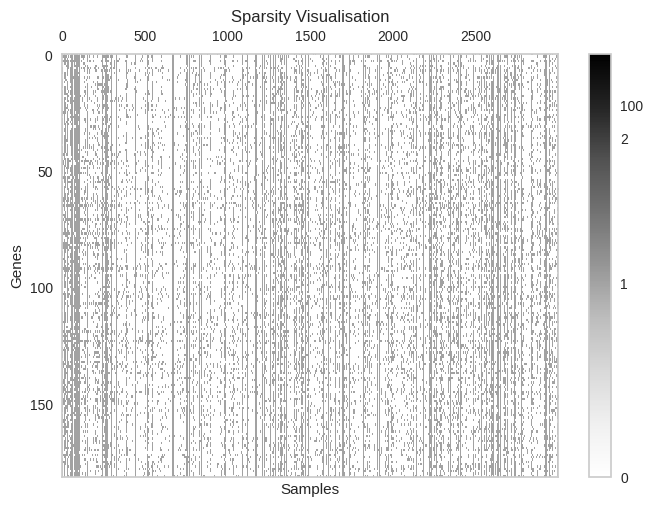

In [ ]:
# Compute sparsity index and visualize
sparsity_index_unfiltered = 1 - (np.count_nonzero(train_t.values) / train_t.size)
print(sparsity_index_unfiltered)

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1.]
        return np.ma.masked_array(np.interp(value, x, y,
                                            left=-np.inf, right=np.inf))

    def inverse(self, value):
        y, x = [self.vmin, self.vcenter, self.vmax], [0, 0.8, 1]
        return np.interp(value, x, y, left=-np.inf, right=np.inf)


fig, ax = plt.subplots()
midnorm = MidpointNormalize(vmin=0, vcenter=1.75, vmax=250)

graph_temporary = plt.spy(train_t, aspect = "auto", norm=midnorm,
                   cmap='Greys') #hsv
plt.colorbar(graph_temporary).set_ticks([0, 1, 2, 100])
plt.grid(False)
plt.xlabel("Samples")
plt.ylabel("Genes")
ax.set_title('Sparsity Visualisation')

plt.show()

The value is pretty high, the matrix is sparse because we have a large number of zeros, as we can see from the visualization.

Now we'll see which are the least and the most expressed genes and also which cells have less genes expressed.

In [ ]:
# which is the gene that is expressed less
min_expressed_gene = train_t.sum(axis = 0).idxmin()
print("Least expressed gene: {}\nNumber of codifying samples: {}".format(min_expressed_gene, train_t.sum(axis = 0)[min_expressed_gene]))

# which is the gene that is expressed most
max_expressed_gene = train_t.sum(axis = 0).idxmax()
print("\nMost expressed gene: {}\nNumber of codifying samples: {}".format(max_expressed_gene, train_t.sum(axis = 0)[max_expressed_gene]))

#which is the cell that expresses less (cell: how many it produces, which uniques)
min_expressed_gene = train_t.sum(axis = 1).idxmin()
print("\nLeast expressing cell: {}\nProduced genes:{}\nUnique genes:{}\n".format(min_expressed_gene, train_t.sum(axis = 1)[min_expressed_gene], train_t.astype(bool).sum(axis = 0).min()))

#which is the cell that expresses most (cell: how many it produces, which uniques)
max_expressed_gene = train_t.sum(axis = 1).idxmax()
print("Most expressing cell: {}\nProduced genes:{}\nUnique genes:{}".format(max_expressed_gene, train_t.sum(axis = 1)[max_expressed_gene], train_t.astype(bool).sum(axis = 0).max()))

Least expressed gene: LRRC9
Number of codifying samples: 12

Most expressed gene: FTL
Number of codifying samples: 4265411

Least expressing cell: output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
Produced genes:392112
Unique genes:2

Most expressing cell: output.STAR.PCRPlate3B3_Hypoxia_S70_Aligned.sortedByCoord.out.bam
Produced genes:926023
Unique genes:182


## **Skewness and Kurtosis**

We proceed the analysis computing skewness and kurtosis.

In [ ]:
train_flattened = pd.Series(train_t.values.flatten())
skew_matrix = skew(train_flattened)
kurtosis_matrix = kurtosis(train_flattened)
print("Skewness of the whole matrix: ", round(skew_matrix))
print("Kurtosis of the whole matrix: ", round(kurtosis_matrix))

Skewness of the whole matrix:  23
Kurtosis of the whole matrix:  1055


They are both high, in particular the fact that the skewness is positive suggests a significant right skewness. High kurtosis indicates extremely heavy tails and a very peaked shape.

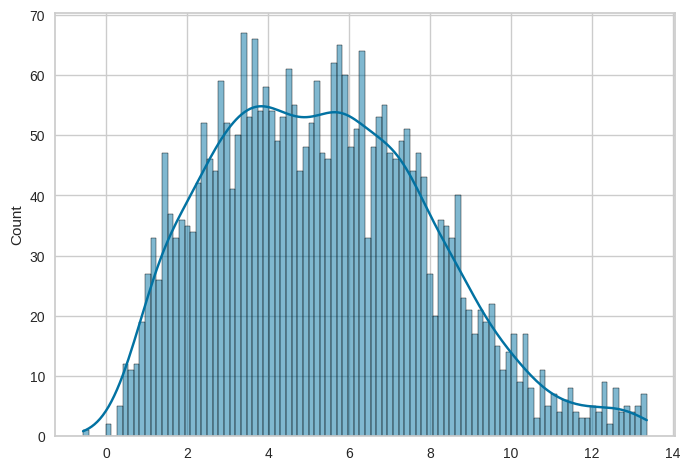

In [ ]:
# skewness by column

train_colnames = list(train_t.columns)
colN = train_t.shape[1]
train_skew_cells = []

for i in range(colN):
    v_df = train_t[train_colnames[i]]
    train_skew_cells += [skew(v_df)] 

sns.histplot(train_skew_cells, bins=100, kde=True)
plt.show()

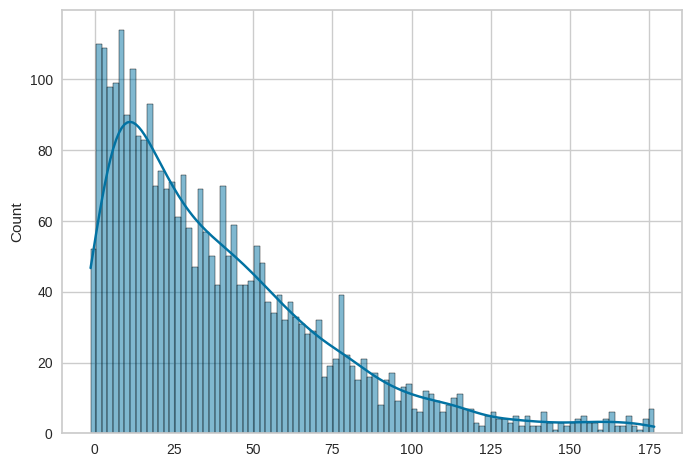

In [ ]:
# and kurtosis...

train_kurtosis_cells = []

for i in range(colN):
    v_df = train_t[train_colnames[i]]
    train_kurtosis_cells += [kurtosis(v_df)]

sns.histplot(train_kurtosis_cells, bins=100, kde=True)
plt.show()

*It's worth noting that such high values of skewness and kurtosis are quite uncommon in typical datasets, and they may indicate extreme outliers or non-normality in the data*

## **Gene Annotation**

The next part will be focused on trying to understand some characteristics of the most expressed genes. To do so, we firstly downloaded a dataset which associates some genes to the type of cell they are mostly found in. The genes considered are mainly **genetic markers**, i.e. genes that usually have a known physical location on a chromosome. <br>
We know that the cells we are considering all come from a specific location, as we are studying breast cancer. However, understanding which of these genetic markers are linked with hypoxia or normoxia the most might be an interesting starting point for further biological research. 

In [ ]:
# which gene are produced the most by each cell
print(pd.DataFrame({'gene': train.idxmax(), 'value': train.max()}))
print("Uniques[{}]: {}".format(train.idxmax().unique().size, train.idxmax().unique()))

                                                     gene  value
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.s...    FTL  39148
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.so...   LDHA  22572
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sort...    FTL  21430
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sort...  KRT19  24033
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.so...    FTL  32768
...                                                   ...    ...
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned....  HSPA5  12319
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned....   CD44  17681
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.so...    FTL  29201
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.s...   CD44  18969
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.s...    FTL  23424

[182 rows x 2 columns]
Uniques[11]: ['FTL' 'LDHA' 'KRT19' 'CD44' 'FTH1' 'HSPA5' 'KRT18' 'LAMB3' 'LAMC2'
 'KRT17' 'MT-RNR2']


In [ ]:
# check for normoxic, hypoxic cells which are the top 10 expressed genes
print("Top 5 genes of normoxic cells:\n", train.loc[:, normoxic_cells].sum(axis = 1).nlargest(5))
print("Top 5 genes of hypoxic cells:\n", train.loc[:, hypoxic_cells].sum(axis = 1).nlargest(5))

Top 5 genes of normoxic cells:
 FTL      2183586
CD44      978371
FTH1      963894
BEST1     839785
LDHA      761234
dtype: int64
Top 5 genes of hypoxic cells:
 LDHA     2333372
FTL      2081825
FTH1     1345141
KRT19    1318946
BEST1    1170762
dtype: int64


In [ ]:
marker_genes = {
    #these one are standard
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
    # these ones are based on Peng-Ju et al., 2020, https://www.frontiersin.org/articles/10.3389/fonc.2020.579868 
    'Endothelial cells': ['VEGFA', 'SLC2A1', 'PGAM1', 'LDHA'],
    'Fibroblasts': ['TPI1', 'P4HA1', 'MRPS17', 'CDKN3'],
    'Adipocytes': ['ADM', 'NDRG1', 'TUBB6'],
    'Myocytes': ['ALDOA', 'MIF']
}

In [ ]:
marker_genes.items()

dict_items([('CD14+ Mono', ['FCN1', 'CD14']), ('CD16+ Mono', ['TCF7L2', 'FCGR3A', 'LYN']), ('ID2-hi myeloid prog', ['CD14', 'ID2', 'VCAN', 'S100A9', 'CLEC12A', 'KLF4', 'PLAUR']), ('cDC1', ['CLEC9A', 'CADM1']), ('cDC2', ['CST3', 'COTL1', 'LYZ', 'DMXL2', 'CLEC10A', 'FCER1A']), ('Normoblast', ['SLC4A1', 'SLC25A37', 'HBB', 'HBA2', 'HBA1', 'TFRC']), ('Erythroblast', ['MKI67', 'HBA1', 'HBB']), ('Proerythroblast', ['CDK6', 'SYNGR1', 'HBM', 'GYPA']), ('NK', ['GNLY', 'NKG7', 'CD247', 'GRIK4', 'FCER1G', 'TYROBP', 'KLRG1', 'FCGR3A']), ('ILC', ['ID2', 'PLCG2', 'GNLY', 'SYNE1']), ('Lymph prog', ['VPREB1', 'MME', 'EBF1', 'SSBP2', 'BACH2', 'CD79B', 'IGHM', 'PAX5', 'PRKCE', 'DNTT', 'IGLL1']), ('Naive CD20+ B', ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM']), ('B1 B', ['MS4A1', 'SSPN', 'ITGB1', 'EPHA4', 'COL4A4', 'PRDM1', 'IRF4', 'CD38', 'XBP1', 'PAX5', 'BCL11A', 'BLK', 'IGHD', 'IGHM', 'ZNF215']), ('Transitional B', ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2']), ('Plasma cells', ['MZB1', 'HSP90B1', 'FNDC3B', '

In [ ]:
marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found
marker_genes_in_data = {k: v for k, v in marker_genes_in_data.items() if v} # keep nonempty sets

In [ ]:
marker_genes_in_data

{'CD14+ Mono': ['CD14'],
 'ID2-hi myeloid prog': ['CD14', 'ID2', 'VCAN', 'S100A9', 'PLAUR'],
 'cDC1': ['CADM1'],
 'Normoblast': ['TFRC'],
 'Erythroblast': ['MKI67'],
 'NK': ['CD247', 'FCER1G'],
 'ILC': ['ID2', 'PLCG2'],
 'Lymph prog': ['MME', 'BACH2'],
 'B1 B': ['EPHA4', 'COL4A4', 'PRDM1'],
 'Transitional B': ['MME'],
 'Plasma cells': ['HSP90B1', 'PRDM1'],
 'Plasmablast': ['PRDM1'],
 'CD4+ T activated': ['TRBC2'],
 'CD4+ T naive': ['TRBC2'],
 'T activation': ['CD69'],
 'T naive': ['LEF1'],
 'HSC': ['PROM1'],
 'MK/E prog': ['ITGA2B', 'PLCB1'],
 'Endothelial cells': ['VEGFA', 'SLC2A1', 'LDHA'],
 'Fibroblasts': ['P4HA1', 'CDKN3'],
 'Adipocytes': ['ADM', 'NDRG1', 'TUBB6'],
 'Myocytes': ['ALDOA', 'MIF']}

In [ ]:
# subtypes we want to show the markers for
cell_subtypes = ["CD14+ Mono", "ID2-hi myeloid prog", "cDC1", "Normoblast"
                 , "Erythroblast", "NK", "ILC", "Lymph prog", "B1 B",
                 "Transitional B", "Plasma cells", "Plasmablast",
                 "CD4+ T activated", "CD4+ T naive", "T activation", "T naive", "HSC",
                 "MK/E prog", "Endothelial cells", "Fibroblasts", "Adipocytes", "Myocytes"]


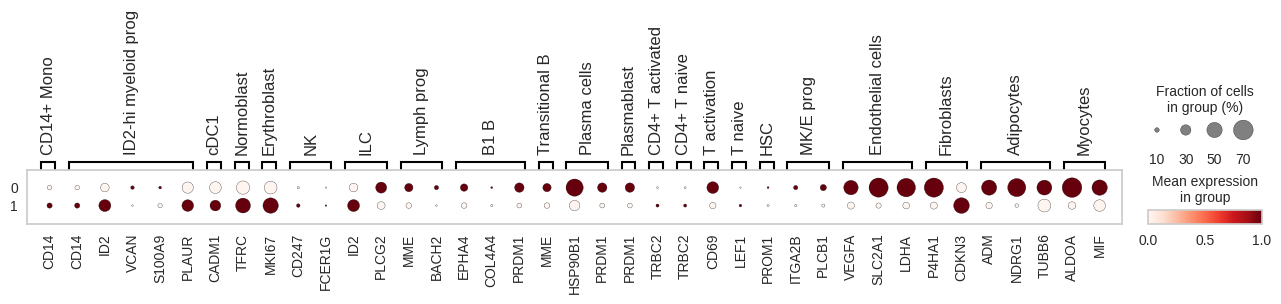

In [ ]:
cell_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in cell_subtypes
}

sc.pl.dotplot(adata, groupby="leiden_res0_75", var_names=cell_markers, standard_scale="var") #0.75

#### **Genes associated with Cluster 0 (Hypoxic cells)**
**HSP90B1**: this gene encodes a member of a family of adenosine triphosphate(ATP)-metabolizing molecular chaperones with roles in stabilizing and folding other proteins. The encoded protein is localized to melanosomes and the endoplasmic reticulum. Expression of this protein is associated with a variety of pathogenic states, including tumor formation. <br>

**SLC2A1**: this gene encodes a major glucose transporter in the mammalian blood-brain barrier. The encoded protein is found primarily in the cell membrane and on the cell surface, where it can also function as a receptor for human T-cell leukemia virus (HTLV) I and II. Mutations in this gene have been found in a family with paroxysmal exertion-induced dyskinesia. <br>

**LDHA**: the protein encoded by this gene catalyzes the conversion of L-lactate and NAD to pyruvate and NADH in the final step of anaerobic glycolysis. The protein is found predominantly in muscle tissue and belongs to the lactate dehydrogenase family. Mutations in this gene have been linked to exertional myoglobinuria. Multiple transcript variants encoding different isoforms have been found for this gene. The human genome contains several non-transcribed pseudogenes of this gene. <br>

**P4HA1**: this gene encodes a component of prolyl 4-hydroxylase, a key enzyme in collagen synthesis composed of two identical alpha subunits and two beta subunits. The encoded protein is one of several different types of alpha subunits and provides the major part of the catalytic site of the active enzyme. In collagen and related proteins, prolyl 4-hydroxylase catalyzes the formation of 4-hydroxyproline that is essential to the proper three-dimensional folding of newly synthesized procollagen chains. Alternatively spliced transcript variants encoding different isoforms have been described. <br>

**NDRG1**: this gene is a member of the N-myc downregulated gene family which belongs to the alpha/beta hydrolase superfamily. The protein encoded by this gene is a cytoplasmic protein involved in stress responses, hormone responses, cell growth, and differentiation; expression of this gene may be a prognostic indicator for several types of cancer. <br>

**ALDOA**: this gene encodes a member of the class I fructose-bisphosphate aldolase protein family. The encoded protein is a glycolytic enzyme that catalyzes the reversible conversion of fructose-1,6-bisphosphate to glyceraldehyde 3-phosphate and dihydroxyacetone phosphate.  Disruption of this gene also plays a role in the progression of multiple types of cancers. <br>


#### **Genes associated with Cluster 1 (Normoxic cells)**
**CDKN3**: the protein encoded by this gene belongs to the dual specificity protein phosphatase family. It was identified as a cyclin-dependent kinase inhibitor, and has been shown to interact with, and dephosphorylate CDK2 kinase, thus prevent the activation of CDK2 kinase. This gene was reported to be deleted, mutated, or overexpressed in several kinds of cancers. <br>

**MKI67**: involved in regulation of chromosome segregation and regulation of mitotic nuclear division. Located in chromosome; nuclear body; and nucleolus. Colocalizes with condensed chromosome. Implicated in Crohn's disease; breast cancer; human immunodeficiency virus infectious disease; and pancreatic cancer. <br>

**TFRC**: this gene encodes a cell surface receptor necessary for cellular iron uptake by the process of receptor-mediated endocytosis. This receptor is required for erythropoiesis and neurologic development



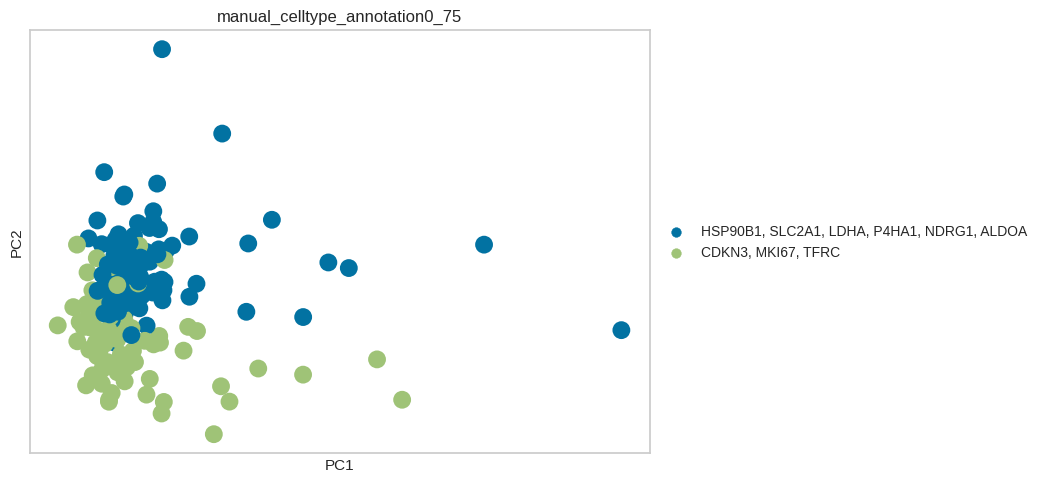

In [ ]:
cluster_annotation0_75 = {
    "0": "HSP90B1, SLC2A1, LDHA, P4HA1, NDRG1, ALDOA", 
    "1": "CDKN3, MKI67, TFRC"
}

adata.obs["manual_celltype_annotation0_75"] = adata.obs.leiden_res0_75.map(cluster_annotation0_75)

sc.pl.pca(adata, color=["manual_celltype_annotation0_75"])


### **Distribution**

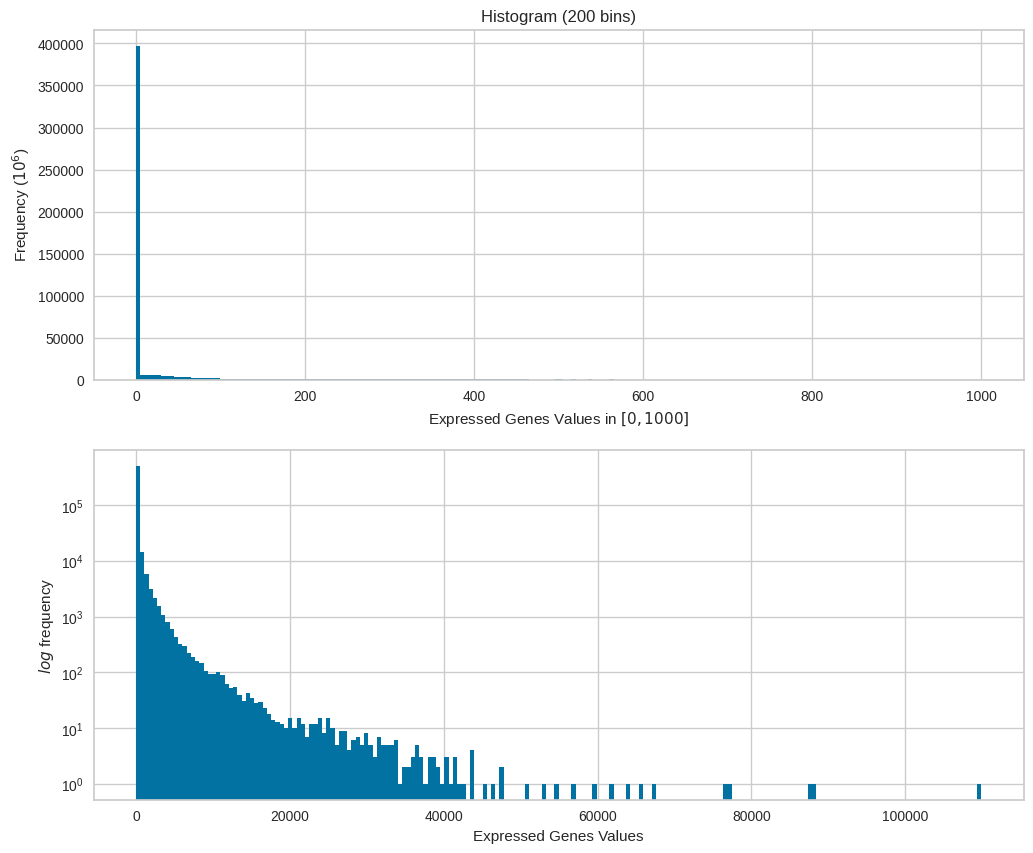

In [ ]:
# distribution of the whole matrix
train_flattened = pd.Series(train_t.values.flatten())
fig, ax = plt.subplots(2, 1, figsize=(12, 10)) 
ax[0].hist(train_flattened, range = [0, 1000], bins = 200)
ax[0].set_xlabel("Expressed Genes Values in $[0, 1000]$")
ax[0].set_ylabel("Frequency ($10^6$)")
ax[0].set_title("Histogram (200 bins)")

ax[1].hist(train_flattened, bins = 200, log = True)
ax[1].set_xlabel("Expressed Genes Values")
ax[1].set_ylabel("$log$ frequency")
plt.show()

Most values are zero, as expected (since we already knew sparsity was very high). We also see that frequency decreases extremely quickly.

In [ ]:
round(train_flattened.describe())

count    546000.0
mean        168.0
std        1047.0
min           0.0
25%           0.0
50%           0.0
75%          16.0
max      109881.0
dtype: float64

In the next section we will consider the original dataframe, not its transpose and we'll divide the cells in hypoxic and normoxic.

In [ ]:
normoxic_cells = train.columns.str.contains('Normoxia')
hypoxic_cells = train.columns.str.contains('Hypoxia')
norm_hypo_cells = pd.Series({"Normoxic" : normoxic_cells, "Hypoxic" : hypoxic_cells})

print("Number of normoxic cells:", normoxic_cells.sum())
print("Number of hypoxic cells:", hypoxic_cells.sum())

print(f'Percentage of normoxic cells: {round(normoxic_cells.sum()/182*100)}%')
print(f'Percentage of hypoxic cells: {round(hypoxic_cells.sum()/182*100)}%')

Number of normoxic cells: 85
Number of hypoxic cells: 97
Percentage of normoxic cells: 47%
Percentage of hypoxic cells: 53%


In [ ]:
codified_genes_normoxia = np.count_nonzero(train.loc[:, normoxic_cells].values)
codified_genes_hypoxia = np.count_nonzero(train.loc[:, hypoxic_cells].values)
print("Codified genes in normoxic cells: ", codified_genes_normoxia)
print("Codified genes in hypoxic cells: ", codified_genes_hypoxia)

Codified genes in normoxic cells:  74888
Codified genes in hypoxic cells:  85344


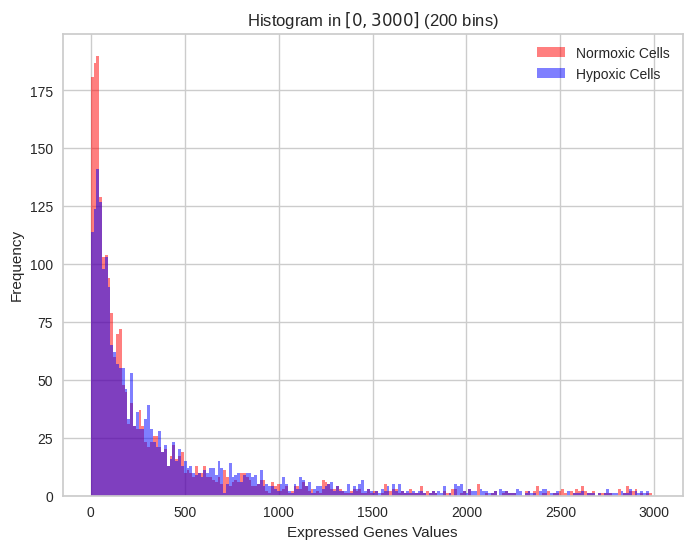

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 
ax.hist(train.loc[:, normoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.5, color = "red", label = "Normoxic Cells")
ax.hist(train.loc[:, hypoxic_cells].sum(axis = 1), range = [0, 3000], bins = 200, alpha = 0.5, color = "blue", label = "Hypoxic Cells")
ax.set_xlabel("Expressed Genes Values")
ax.set_ylabel("Frequency")
ax.set_title("Histogram in $[0, 3000]$ (200 bins)")
ax.legend()
plt.show()

Hypoxic and normoxic cells follow a similar distribution pattern, with most gene expression values being 0. This also tells us that, overall, the cells do not differ in the amount of genes they codify for.

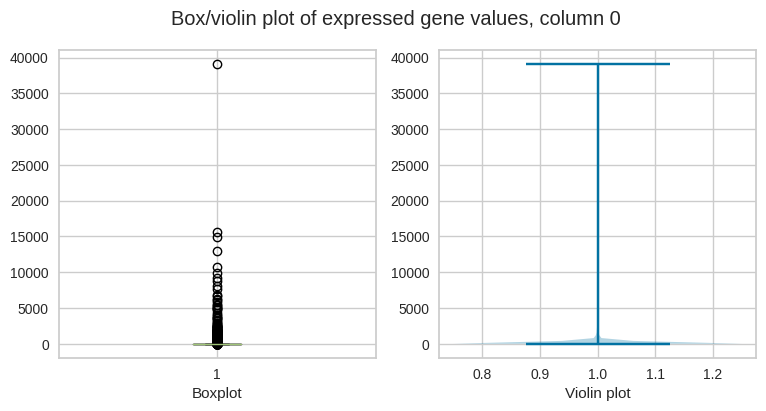

In [ ]:
# boxplot and violin plot of a single column
col = train.iloc[:, 0]
fig, ax= plt.subplots(1,2, figsize=(9, 4))
plt.suptitle("Box/violin plot of expressed gene values, column 0")
ax[0].boxplot(col)
ax[1].violinplot(col)
ax[0].set_xlabel("Boxplot")
ax[1].set_xlabel("Violin plot")
plt.show()


Again, we see that most of the distribution is around zero.


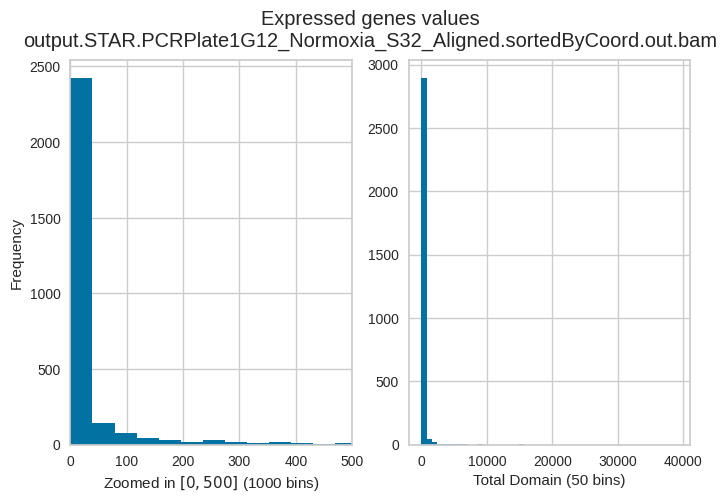

In [ ]:
# histogram of a single column
col = train.iloc[:, 0]
fig, axs = plt.subplots(1, 2, figsize=(8, 5))
col.hist(ax=axs[0], bins=1000)
col.hist(ax=axs[1], bins=50)
plt.suptitle(f"Expressed genes values\n{col.name}")
axs[0].set_xlim(0, 500)
axs[0].set_xlabel("Zoomed in $[0, 500]$ (1000 bins)")
axs[0].set_ylabel("Frequency")
axs[1].set_xlabel("Total Domain (50 bins)")
plt.show()

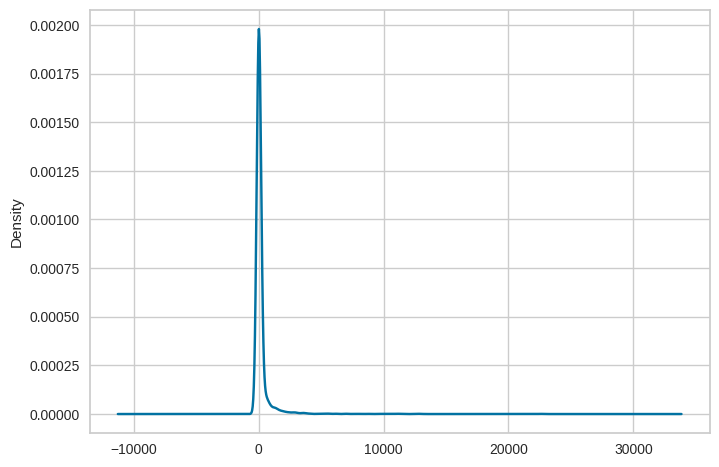

In [ ]:
# density of one column of the data
train[train.columns[1]].plot.density(legend = False)
plt.grid(True)
plt.show()

Analyzing just one column, which is one single cell, we notice a big spike around zero, as expected. <br>
Giving this analysis, we can conclude that this dataset is very similar to HCC1806_unfiltered (i.e. its unfiltered version) and has approximately all the same properties, which is good for our training. For a more detailed analysis, see HCC1806_unfiltered.ipynb.

## **Dimensionality Reduction**

In this section we explore different methods to approach dimensionality reduction. These tecniques will be fundamental to visualize clusters later on.

First we define a function we will use for visualization.

In [ ]:
counts_per_cell = train_t.sum(axis = 1) # number of counts per cell
number_of_genes = np.count_nonzero(train_t, axis=1) #number of detected genes count
cell_types = pd.Series(index=train_t.index) # type of each cell
for i, col in enumerate(train_t.index):
    if "Norm" in train_t.index[i]:
        cell_types[col] = 'Normoxia'
    else:
        cell_types[col] = 'Hypoxia'

# type1
colors1 = counts_per_cell
# type2
cmap = {'Hypoxia': 'red', 'Normoxia': 'blue'}
colors2 = [cmap[cell_type] for cell_type in cell_types]

def plot_dim_red(dim_type, df, ax1, ax2, ax3):

  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

  plt.suptitle(f"{dim_type} Visualization")

  # counts per cell - 2D
  sctr2d = axs[0, 0].scatter(df[:, 0], df[:, 1], c=colors1, cmap='jet')
  # sctr2d = axs[0, 0].scatter(df[:, 0], df[:, 1], c=colors1)
  axs[0, 0].set_xlabel(ax1)
  axs[0, 0].set_ylabel(ax2)
  axs[0, 0].grid(True)
  if dim_type == "PCA":
    axs[0, 0].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1], 2)}")

  # counts per cell - 3D
  axs[0, 1].remove()
  axs[0, 1] = fig.add_subplot(222, projection='3d')
  sctr3d = axs[0, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors1, cmap='jet')
  axs[0, 1].set_xlabel(ax1)
  axs[0, 1].set_ylabel(ax2)
  axs[0, 1].set_zlabel(ax3)
  if dim_type == "PCA":
    axs[0, 1].set_title(f"Explained Variance:{round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2], 2)}")
  fig.colorbar(sctr3d, ax=axs[0, 1], label="Counts per cell")

  # hypoxia normoxia - 2D
  sctr2d = axs[1, 0].scatter(df[:, 0], df[:, 1], c=colors2)
  axs[1, 0].set_xlabel(ax1)
  axs[1, 0].set_ylabel(ax2)
  axs[1, 0].grid(True)
  handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=val, label=key)[0] for key, val in cmap.items()]
  axs[1, 0].legend(handles=handles, numpoints=1, loc='lower right')

  # hypoxia normoxia - 3D
  axs[1, 1].remove()
  axs[1, 1] = fig.add_subplot(224, projection='3d')
  sctr3d = axs[1, 1].scatter(df[:, 0], df[:, 1], df[:, 2], c=colors2)
  axs[1, 1].set_xlabel(ax1)
  axs[1, 1].set_ylabel(ax2)
  axs[1, 1].set_zlabel(ax3)

  plt.tight_layout()


### **PCA**

Note that from now on we will focus only on the transpose of our dataset, i.e. columns will be different genes and rows will be different cells. <br>
Moreover, as we have seen in the exploratory data analysis, the data are not standardized, so we will do it now to have a better visualization of the data.
For all the dimensionality reduction methods that we adopted, we also tried to not scale the data, but found that a scaled representation was more easily interpretable.

In [16]:
train_scaled = pd.DataFrame(StandardScaler().fit_transform(train_t), columns=train_t.columns)

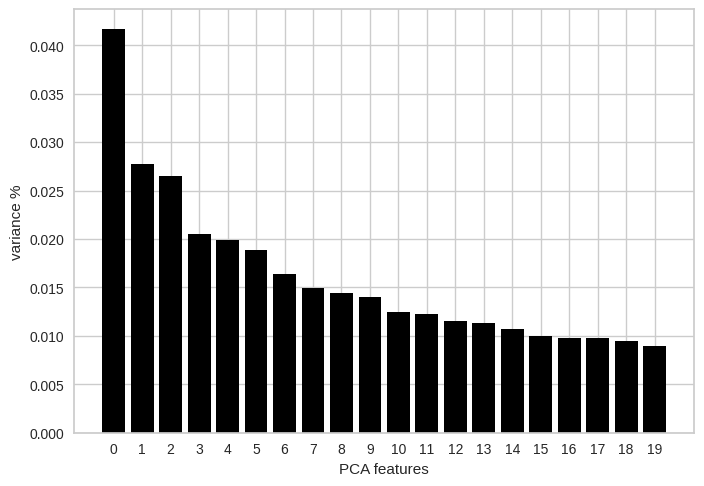

In [ ]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(train_scaled)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

explained_variances = pca.explained_variance_ratio_
explained_variances_percentage = explained_variances * 100

cumulative_variances = np.cumsum(explained_variances)
cumulative_variances_percentage = cumulative_variances * 100


In [ ]:
print(f"Explained Variance Ratio PC1: {round(pca.explained_variance_ratio_[0], 4)}\
      \nExplained Variane Ratio PC2: {round(pca.explained_variance_ratio_[1], 4)}\
      \nExplained Variance Ratio PC3: {round(pca.explained_variance_ratio_[2], 4)}")

For the sake of visualization, we decide to run PCA on the first two and three components, although we see that the percentage of variance explained is small.

In [ ]:
pca = PCA()

In [ ]:
train_pca = pca.fit_transform(train_scaled)

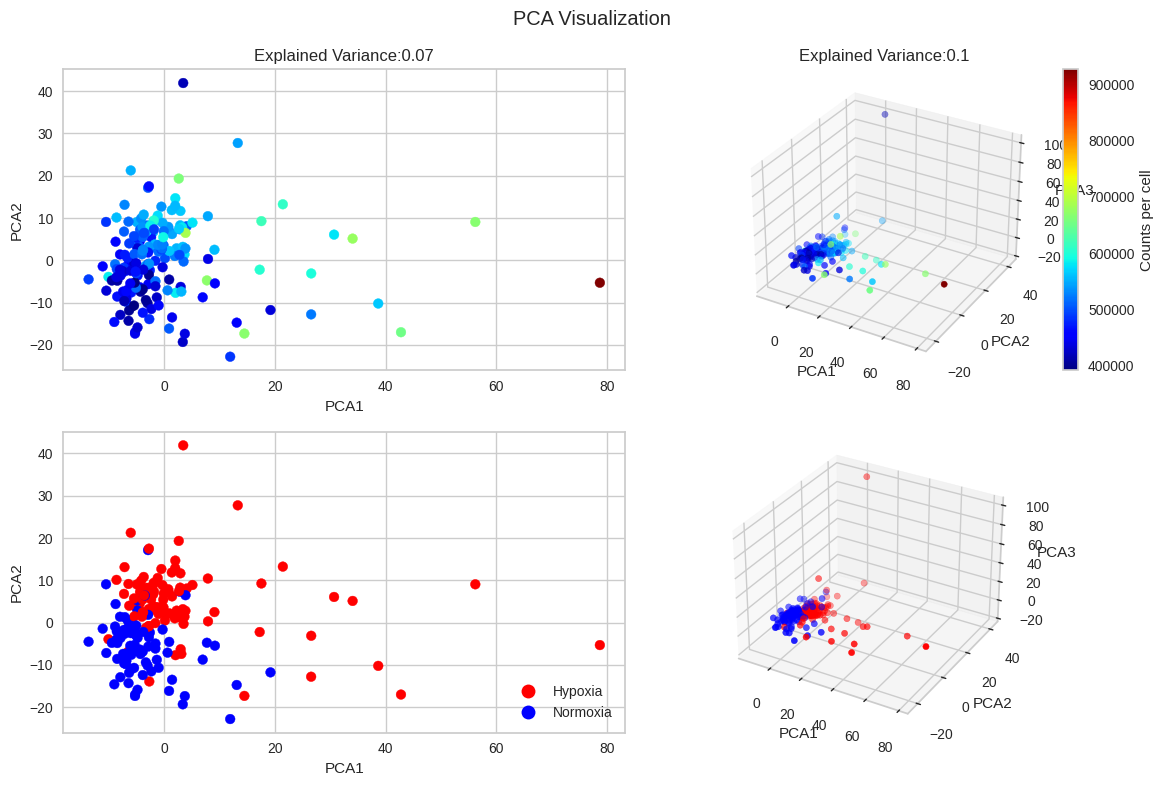

In [ ]:
plot_dim_red("PCA", train_pca, "PCA1", "PCA2", "PCA3")
plt.show()

Althought the explained variance is low, we can very clearly see a distinction between the two cell classes. In addition, hypoxic cells seem to be slightly more spread.

We can compute the number of dimensions that explain 95% of the variance:

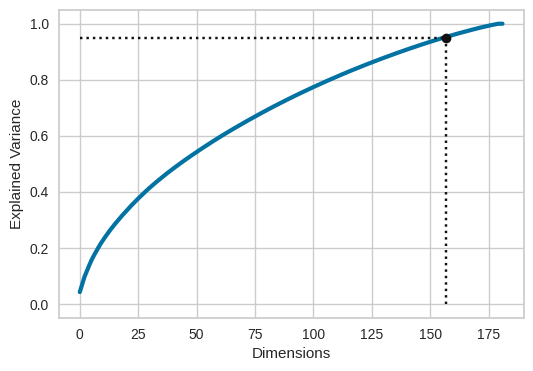

Number of dimension explaining 95% of the variance is: 157


In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)

plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.grid(True)
plt.show()

print(f'Number of dimension explaining 95% of the variance is: {d}')

And we can also visualize how the explained variance changes between the different components, which confirms that the first components explain most of the variance.

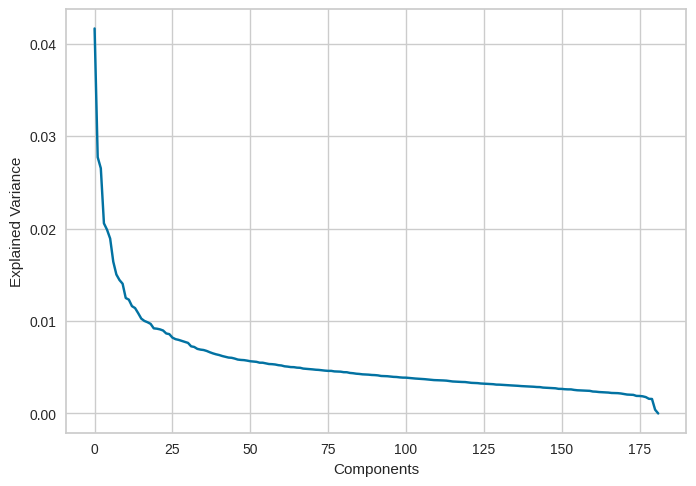

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.grid(True)
plt.show()

### **t-SNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components = 3, perplexity = 15, random_state = 42)
train_tsne = tsne.fit_transform(train_scaled)

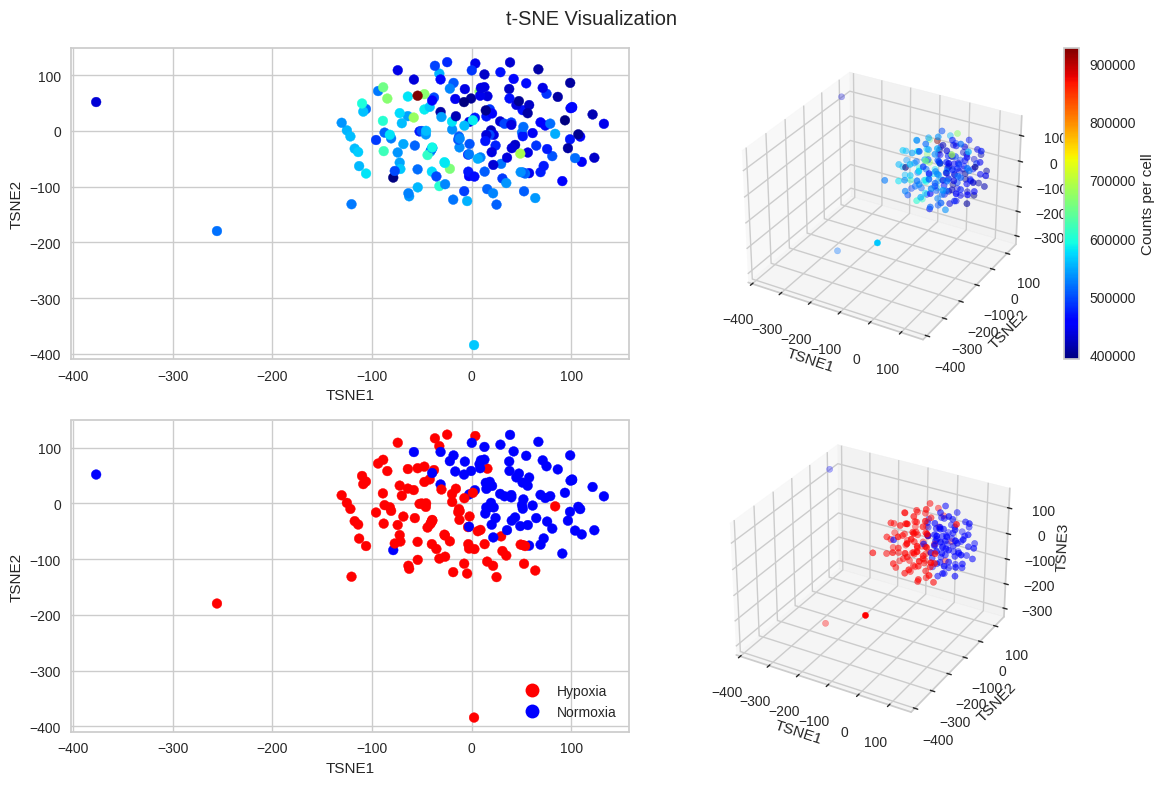

In [ ]:
plot_dim_red("t-SNE", train_tsne, "TSNE1", "TSNE2", "TSNE3")
plt.show()

The representation using tSNE shows us once again the separation between hypoxic and normoxic cells.

# **Unsupervised Training: Clustering**

For the unsupervised training part, we only focus on clustering to check if the dataset is divided in two clear *sections* or if more can be found. In general, as we have seen in the Dimensionality reduction section, we will use standardized data.

## **K-Means with Elbow Method**

We start with kmeans algorithm, which is usefull to visualize exclusive clusters.

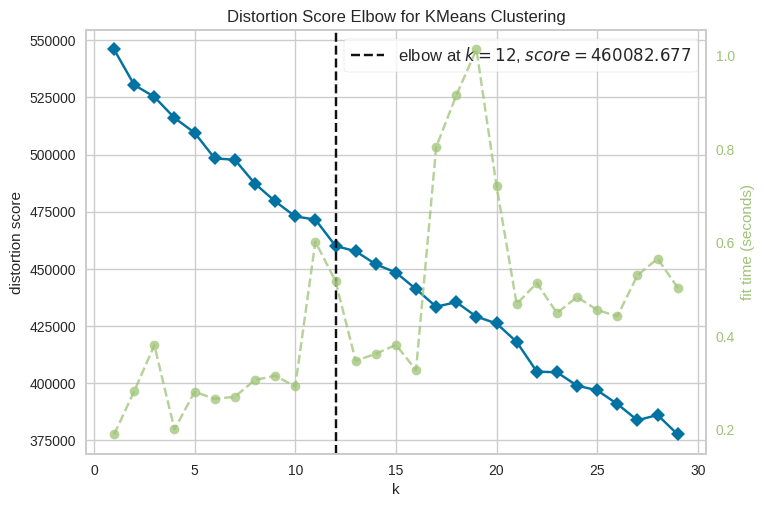

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,30), timings= True)
visualizer.fit(train_scaled)
visualizer.show()

We can't clearly see an elbow point (even though the algorithm analytically detects one), thus we try to run k-means with k = 2, and see if it finds the two clusters corresponding to hypoxia and normoxia.

### **Visualization**

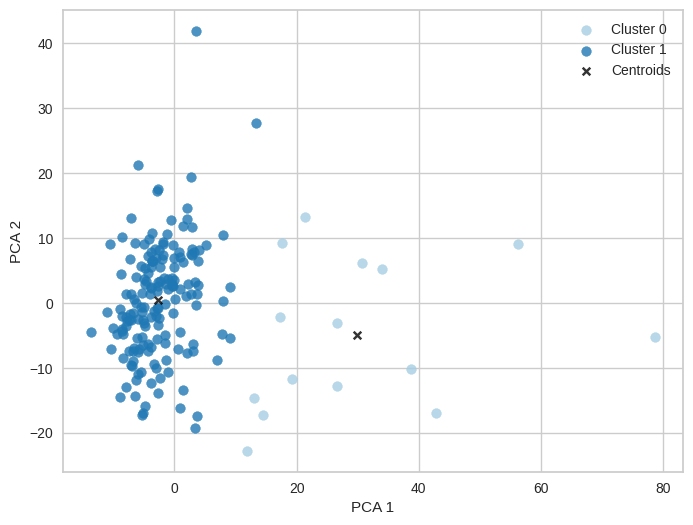

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
pca = PCA(n_components=2)
PCA_components = pca.fit_transform(train_scaled)
kmeans.fit(PCA_components)
cluster_labels = kmeans.predict(PCA_components)
centroids = kmeans.cluster_centers_
train_t['cluster'] = cluster_labels
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Paired", n_colors=2)

for i in range(2):
    ax.scatter(PCA_components[train_t['cluster']==i, 0], PCA_components[train_t['cluster']==i, 1], alpha=0.8, label='Cluster '+str(i), color=colors[i])

ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=30, color='black', alpha = 0.8, label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
ax.legend()
plt.show()


### **3D Visualization**

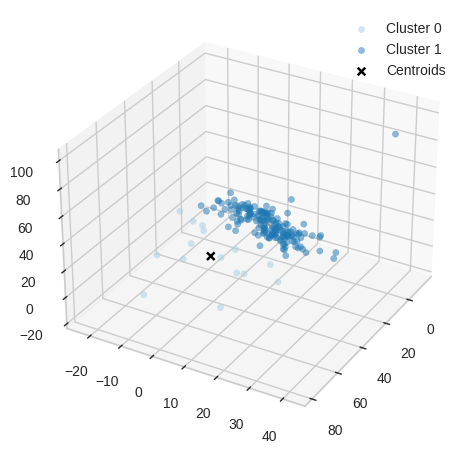

In [ ]:
pca = PCA(n_components=3) 
PCA_components = pca.fit_transform(train_scaled)

kmeans.fit(PCA_components)

cluster_labels = kmeans.predict(PCA_components)

train_t['cluster'] = cluster_labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette("Paired", n_colors=9)

for i in range(2):
    ax.scatter(PCA_components[train_t['cluster']==i, 0], PCA_components[train_t['cluster']==i, 1], PCA_components[train_t['cluster']==i, 2], alpha=0.8, label='Cluster '+str(i), color=colors[i])

ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 30, c = 'black',
           marker='x', label = 'Centroids')

ax.legend()
ax.view_init(azim=30, elev=30)

plt.show()

Now we check whether the two clusters correspond to our two classes.

In [ ]:
train_t['cluster']

output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam      1
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam        1
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam        1
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam      1
                                                                       ..
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      1
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     1
Name: cluster, Length: 182, dtype: int32

In [ ]:
train_label_int = np.array(train_t.index.map(lambda x: "1" if "Norm" in x else "0"))

In [ ]:
correct_pred = 0
for i in range(182):
    if str(train_t['cluster'][i]) == train_label_int[i]:
        correct_pred += 1


In [ ]:
print(f'Correct Predictions are: {correct_pred}; percentage of correct predictions over the whole dataset is: {round((correct_pred/182)*100)}%')

The number of correct predictions is: 94


This is not a great result, which is not surprising: as a matter of fact, just by looking at the visualization, we see that the number of cells in cluster 0 is clearly smaller than the number of cells in cluster 1, while we know that the number of hypoxic and normoxic cells is more or less the same. <br>

However, we will see later that some other clustering techniques give us higher accuracy in detecting these two classes.

## **Hierarchical Clustering**

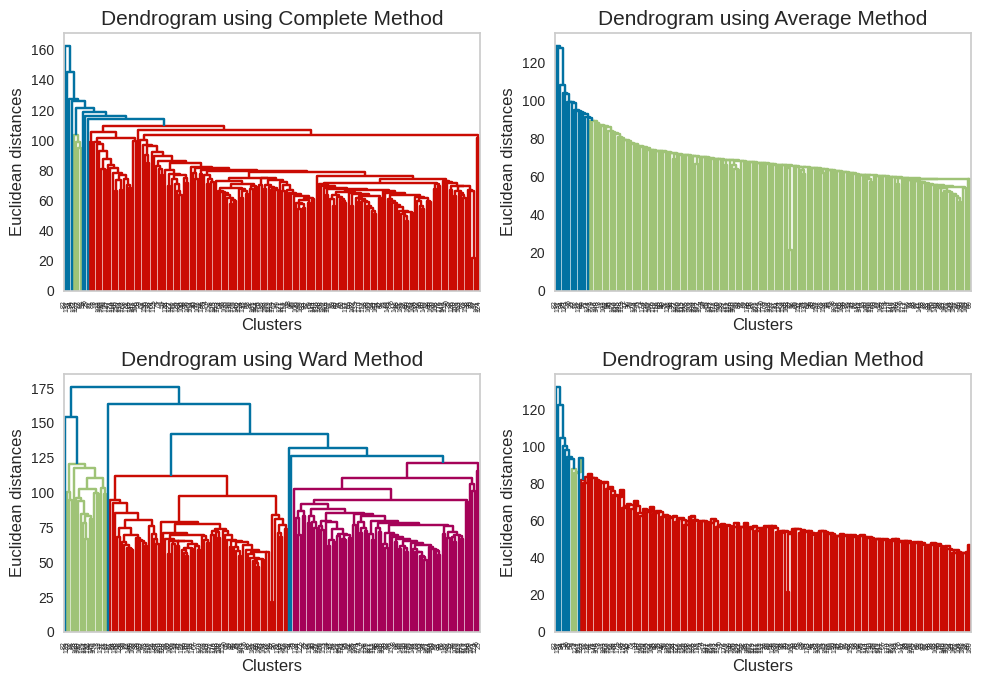

In [ ]:
linkage_methods = ['complete', 'average', 'ward', 'median']

fig, axs = plt.subplots(len(linkage_methods)//2, 2, figsize=(10, 7))

for i, method in enumerate(linkage_methods):
    row = i // 2
    col = i % 2
    dend = dendrogram(linkage(train_scaled, method=method), ax=axs[row, col])
    axs[row, col].set_title(f"Dendrogram using {method.capitalize()} Method", fontsize=15)
    axs[row, col].set_xlabel('Clusters', fontsize=12)
    axs[row, col].set_ylabel('Euclidean distances', fontsize=12)
    axs[row, col].grid(False)

fig.tight_layout()
plt.show()

We can clearly see that the most effective method is the Ward method, since the other three just give us one big cluster and a small one probably containing outliers. The Ward method gives us 3 clusters plus a fourth mostly composed by outliers.

### **Visualization**

So, we proceed by visualizing the 4 clusters we found.

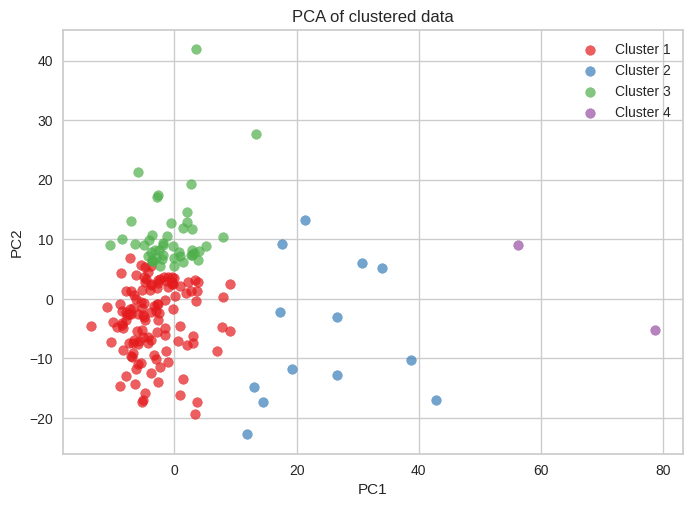

In [ ]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

pca = PCA(n_components=2)
pca_data = pca.fit_transform(train_scaled)

model.fit(pca_data)

cluster_means = []
for i in range(model.n_clusters_):
    cluster_means.append(train_scaled[model.labels_ == i].mean())

colors = sns.color_palette("Set1", n_colors=4)
for i in range(4):
    x = pca_data[:, 0][model.labels_ == i]
    y = pca_data[:, 1][model.labels_ == i]
    plt.scatter(x, y, c=colors[i], alpha=0.7)

cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.legend(cluster_names)
plt.title('PCA of clustered data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### **3D Visualization**

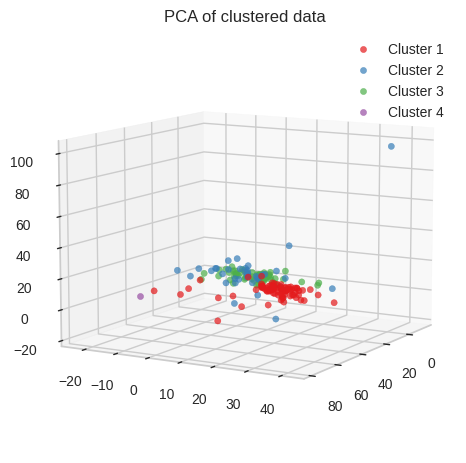

In [ ]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(train_scaled)

cluster_means = []
for i in range(model.n_clusters_):
    cluster_means.append(train_scaled[model.labels_ == i].mean())

pca = PCA(n_components=3) 
pca_data = pca.fit_transform(train_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = sns.color_palette("Set1", n_colors=4)
for i in range(4):
    x = pca_data[:, 0][model.labels_ == i]
    y = pca_data[:, 1][model.labels_ == i]
    z = pca_data[:, 2][model.labels_ == i]
    ax.scatter(x, y, z, c=colors[i], alpha=0.7)
    
ax.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
ax.set_title('PCA of clustered data')
ax.view_init(azim=30, elev=10)
plt.show()


The visualization confirms that the three cluster are good, and the fourth one contains mostly outliers. The fact that the algorithm finds more than two clusters might be correlated to cell cycles.

## **Leiden Clustering Technique**

In [ ]:
!pip install scanpy
import scanpy as sc
sc.settings.verbosity = 0
leiden = train.transpose()
adata = sc.AnnData(leiden.copy())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True, percent_top=[20], log1p=True)
sc.pp.scale(adata)
sc.pp.pca(adata, svd_solver="arpack", n_comps = 181) # same plot as before
sc.pp.neighbors(adata, n_pcs = 157) # computes the KNN graph on the lower-dim space on 265 components (95% variance)

In [ ]:
!pip install leidenalg
sc.tl.leiden(adata)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res0_6", resolution=0.6)
sc.tl.leiden(adata, key_added="leiden_res0_75", resolution=0.75)
sc.tl.leiden(adata, key_added="leiden_res0_8", resolution=0.8)
sc.tl.leiden(adata, key_added="leiden_res0_9", resolution=0.9)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

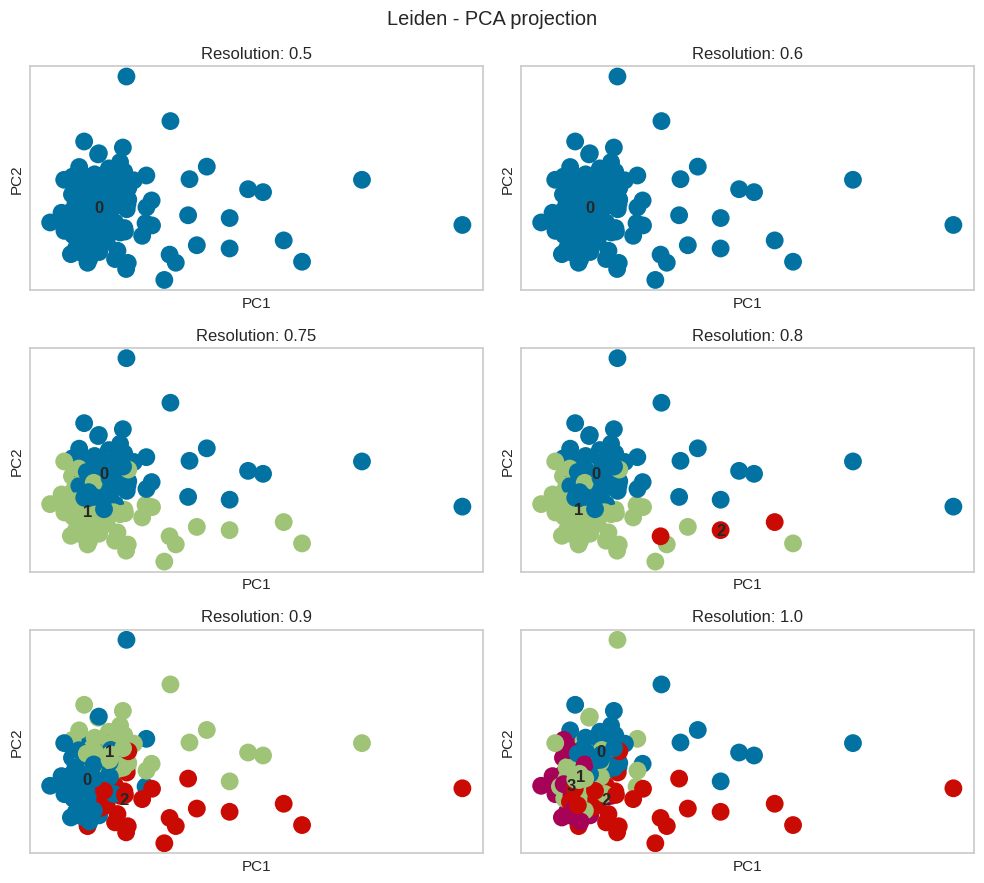

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9))
plt.suptitle("Leiden - PCA projection")

sc.pl.pca(adata, color="leiden_res0_5", legend_loc="on data", ax=axs[0, 0], show=False)
axs[0, 0].set_title("Resolution: 0.5")

sc.pl.pca(adata, color="leiden_res0_6", legend_loc="on data", ax=axs[0, 1], show=False)
axs[0, 1].set_title("Resolution: 0.6")

sc.pl.pca(adata, color="leiden_res0_75", legend_loc="on data", ax=axs[1, 0], show=False)
axs[1, 0].set_title("Resolution: 0.75")

sc.pl.pca(adata, color="leiden_res0_8", legend_loc="on data", ax=axs[1, 1], show=False)
axs[1, 1].set_title("Resolution: 0.8")

sc.pl.pca(adata, color="leiden_res0_9", legend_loc="on data", ax=axs[2, 0], show=False)
axs[2, 0].set_title("Resolution: 0.9")

sc.pl.pca(adata, color="leiden_res1", legend_loc="on data", ax=axs[2, 1], show=False)
axs[2, 1].set_title("Resolution: 1.0")

plt.tight_layout()
plt.show()

Consider now only the Leiden clustering with resolution 0.75, as it gives us two clearly distinct clusters: we want to see whether these clusters correspond to Hypoxia and Normoxia.

In [ ]:
cluster_assignments = adata.obs['leiden_res0_75']

output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam       0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam       0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam     0
output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam    1
output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam     1
output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam       0
Name: leiden_res0_75, dtype: category
Categories (2, object): ['0', '1']


In [ ]:
train_label_int = np.array(leiden.index.map(lambda x: "1" if "Norm" in x else "0"))

In [ ]:
correct_pred = 0
for i in range(len(cluster_assignments)):
    if cluster_assignments[i] == train_label_int[i]:
        correct_pred += 1


In [ ]:
print(f'Correct Predictions are: {correct_pred}; percentage of correct predictions over the whole dataset is: {round((correct_pred/182)*100)}%')

Correct Predictions are: 148; percentage of correct predictions over the whole dataset is: 81%


We see that this clustering technique identifies two classes: in the majority of cases, cells in cluster 0 are hypoxic cells and cells in cluster 1 are normoxic, so our hypotesis is confirmed. 

# **Supervised Training**

Now we will start to actually implement Machine Learning algorithms: since we are interested in training our models to correctly predict a label, which is now given, it will be an instance of supervised training. We will try different methods, to see which one works the best on our data.

## **Hyperparameter Selection**

Before implementing the training procedure we will run hyperparameter selection on some of our models. This can greatly improve our performance, while poor choices can lead to overfitting, underfitting, or poor generalization. The reason why we use the models present in this section, will be explain later.

Note that we won't consider the class weight parameter, since the 50/50 distribution of labels doesn't bias the models to any particular classes. This decision was also drawn by initially running the hyperparameter search with the aforementioned parameter, but we noticed that it only slowed the computation since it always gave a 50-50 weight to the two labels, as our hypothesis suggested.

In [7]:
import warnings
warnings.filterwarnings('ignore')

### **KNN**

In this section, we want to find the optimal number of neighbors on which we will perform the majority vote to find the class of new instance point. If the value of k is too low, we can have mislabelling (for example because of outliers); on the other hand, if we choose k to be too high, we might look at samples that are too far away (and therefore not relevant for a given instance). 

We will choose the optimal k using cross-validation on the training set. We calculate the accuracy score for each k and then take the one with the highest value.

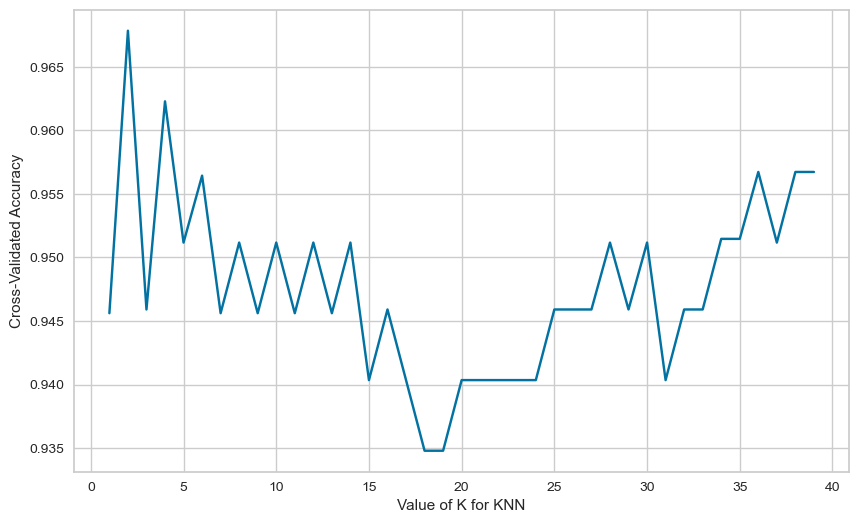

In [56]:
k_scores = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_t, train_label, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

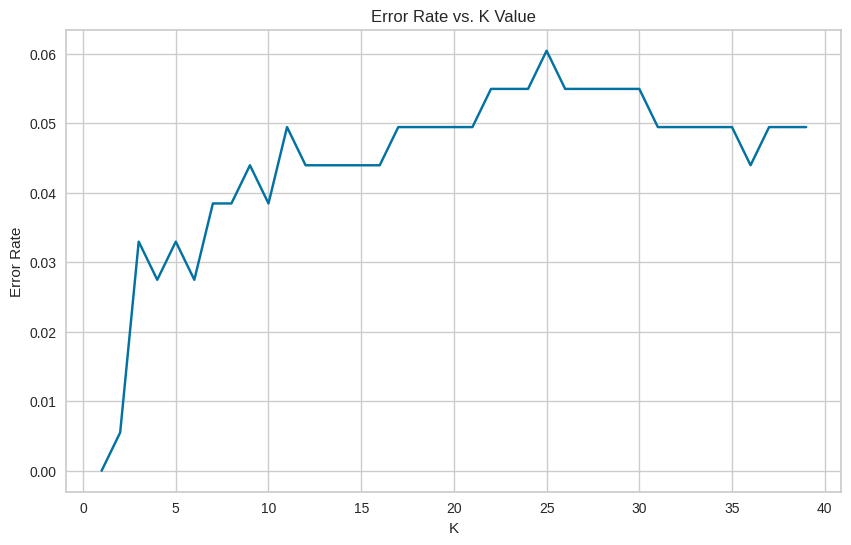

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_t ,train_label)
    pred_i = knn.predict(train_t)
    error_rate.append(np.mean(pred_i != train_label))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

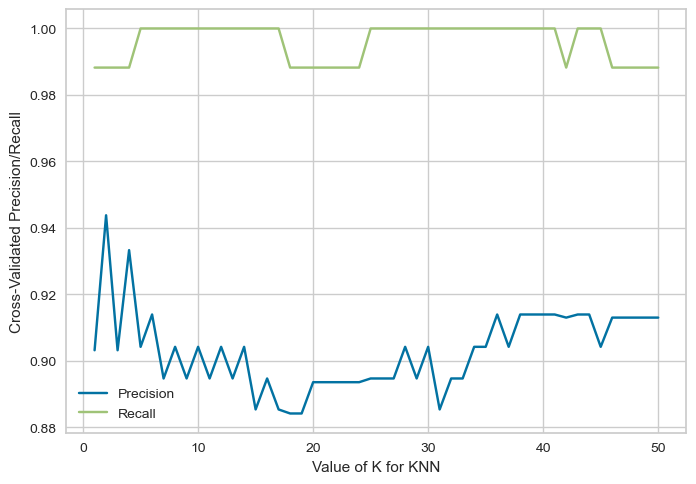

In [52]:
k_precision = []
k_recall = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    label_pred = cross_val_predict(knn, train_t, train_label, cv=10)
    prec = precision_score(train_label, label_pred, pos_label="Normoxia")
    rec = recall_score(train_label, label_pred, pos_label="Normoxia")
    k_precision.append(prec.mean())
    k_recall.append(rec.mean())

plt.plot(range(1, 51), k_precision, label='Precision')
plt.plot(range(1, 51), k_recall, label='Recall')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Precision/Recall')
plt.legend()
plt.show()

In [63]:
k = k_scores.index(np.max(k_scores)) + 1

2

We see that the error is minimal at k = 2 (and accuracy, precision and recall are optimal); this, however, might lead to overfitting, so we choose k = 7, since from the graph we see that the error rate is still very low and we think that this value of k will be large enough to prevent misclassification.

### **SGD with Grid Search**

Altough the number of hyperparamters for the SGD classifier is higher then other models that we used, we decied use to still use Grid Search cross-validation to perform hyperparamter tuning. We first tried with Randomized Search, which searches for optimality in a random manner. In this way we reduced the processing time but with the possibility of not achieving the optimal combination. On the other hand using Grid Search we look for the subset of parameters continuously, so we are sure to reach the optimal subset. 

In [6]:
sgd = SGDClassifier(random_state=42)

In [ ]:
loss = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = [1, 10, 20, 50, 100]

param_grid = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           eta0=eta0)

grid_cv = GridSearchCV(estimator=sgd, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
grid_result = grid_cv.fit(train_t, train_label)

In [8]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9836257309941521
Best Params:  {'alpha': 0.1, 'eta0': 100, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


So, the best subset of parameters is achieved with *elastic net* regularization (combination of LASSO and Ridge), *modified_huber* as a loss function, a learning rate of 100 with an *adaptive* learning rate schedule, i.e. eta = eta0, as long as the training keeps decreasing. Eache time the decrease fails, the eta=eta/5. Finally, *alpha*, which is the multiplier of the regularization term is set to 0.01.

### **Logistic regression with Grid Search**



Here we follow the same procedure done with SGD

In [ ]:
logi = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)

grid = GridSearchCV(estimator=logi, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_result = grid.fit(train_t, train_label)


In [10]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9944444444444445
Best Params:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Also in this case the best accuracy score is approximately 99%, achieved with *l1* regularization (LASSO), and the *liblinear* solver, which runs a one-versus-rest scheme to handle multiple classes. The *C* value, inverse regularization strength, is set to 0.1.

### **SVC with Grid Search**

We decided to perform hyperparameter selection on SVC rather than Linear SVC since from the previous plots, it seems that a linear model will perform well, and so we try to optimize the performance of the standart SVC. After model evaluation we could think about doing parameter tuning also on Linear SVC, in order to achieve better results.

In [14]:
svc = SVC()

In [17]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto']
kernel = ['rbf', 'poly', 'linear', 'sigmoid']

param_grid = dict(gamma=gamma,
                  C=C,
                  kernel=kernel)

grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
grid_result = grid.fit(train_scaled, train_label)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


In [18]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9780701754385964
Best Params:  {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


The best parameters for this classifier are: *C* = 1; *gamma* = scale, which is a parameter for non-linear hyperplanes that when set to scale it uses 1 / (n_features * train.var()). Lastly the *kernel* is set to sigmoid, which is the frequently used for binary classification.

## **Model Pipeline**

Here we start building the pipeline, useful to automate the evaluation procedure for the selected models. All the models have adjusted hyperparameters, as a consequence of the previous tuning.

In [23]:
model_pipeline = []
model_pipeline.append(DummyClassifier())
model_pipeline.append(SGDClassifier(penalty = 'elasticnet', loss = 'modified_huber', learning_rate = 'adaptive', eta0 = 100, alpha = 0.01, random_state = 42))
model_pipeline.append(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear'))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(SVC(C=1, gamma="scale", kernel="sigmoid"))
model_pipeline.append(LinearSVC())
model_pipeline.append(KNeighborsClassifier(n_neighbors=k))

In order to try and get the best results in the classification process, we decided to select models with different characteristics.
- The Stochastic Gradient Descent Classifier, is a linear classifier model that utilizes the stochastic gradient descent algorithm for optimization. It is an efficient and scalable model suitable for large datasets with sparse and high-dimensional feature spaces. In our case we use the *modified huber loss*, which is a smooth loss function and *elastic net regularization*, which finds a good balance between LASSO and Ridge.
- Logistic Regression models the relationship between a set of independent variables (features) and a binary dependent variable (target) using a logistic function. Also in this case we have **l1 penalty**, suggesting the importance of sparsity in our dataset.
- Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees; it is generally characterized by robustness and versatility, with the ability to handle high-dimensional datasets.
- Support Vector Classifier is based on the Support Vector Machines framework, which aims to find an optimal hyperplane that separates data points belonging to different classes with the largest possible margin. The main reason why we decided to include it is because it is especially effective when dealing with datasets that have a clear margin-based separation between classes, both when the margin is linear and when it is non-linear (thanks to a kernel change). The only complication of using SVC on large datasets is the curse of dimensionality, which makes is computationally expensive.
- Linear SVC is a variant of SVC designed to handle linearly separable data. Conversely to general SVC, it perofrms well on large datasets.
- K-Nearest-Neightbors is a non-parametric algorithm that makes predictions based on the similarity of the input data point to its k nearest neighbors in the training dataset. This algorithm is especially good at dealing with complex decision boundaries, but scales badly with dimensions.

Another model that was taken in consideration but then discarded was Gaussian Naive Bayes, which is a widely use probabilistic classification model, but we decided to not use it since it assumes gaussian distribution of data (which is clearly not our case, as was seen with skewness and kurtosis score).

### **Model Evaluation**

In [20]:
model_index = ["Dummy", "SDG", "Logistic", "Random Forest", "SVM", "Linear SVM", "KNN"]

Note that the Dummy classifier gives you a measure of baseline performance, that is the performance of a model that simply guesses

In [26]:
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []


for model in model_pipeline:


  if isinstance(model, (SVC, LinearSVC, KNeighborsClassifier)):
    model.fit(train_scaled, train_label)
  else:
    model.fit(train_t, train_label)

  acc_scores = cross_val_score(model, train_t, train_label, scoring="accuracy", cv=10)
  acc_list.append(f"{acc_scores.mean().round(3)}±{acc_scores.std().round(3)}")

  label_pred = cross_val_predict(model, train_t, train_label, cv=10)
  cm_list.append(confusion_matrix(train_label, label_pred))


  prec_score = precision_score(train_label, label_pred, pos_label="Normoxia")
  rec_score = recall_score(train_label, label_pred, pos_label="Normoxia")
  f_score = f1_score(train_label, label_pred, pos_label="Normoxia")
  prec_list_n.append(f"{prec_score.mean().round(3)}±{prec_score.std()}")
  rec_list_n.append(f"{rec_score.mean().round(3)}±{rec_score.std().round(3)}")
  f1_list_n.append(f"{f_score.mean().round(3)}±{f_score.std().round(3)}")

  if isinstance(model, DummyClassifier):
    auc_val = None
    coef = None
  elif isinstance(model, (RandomForestClassifier, KNeighborsClassifier)):
    scores = cross_val_predict(model, train_t, train_label, cv=10, method="predict_proba")[:, 1]
    auc_val = roc_auc_score(train_label, scores).round(3)

    if isinstance(model, RandomForestClassifier):
      coef = np.array(model.feature_importances_).ravel()
    else:
      coef = None

  elif isinstance(model, SVC):
    coef = None

  else:
    scores = cross_val_predict(model, train_t, train_label, cv=10, method='decision_function')
    auc_val = roc_auc_score(train_label, scores).round(3)
    coef = np.array(model.coef_).ravel()

  auc_list.append(auc_val)

  # This part is needed afterwards, for gene annotation.

  importance = {}
  features = np.array(train_t.columns)
  if coef is not None:
    for i, c in enumerate(coef):
      importance[features[i]] = c

    largest_items = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:30]
    largest_keys = [item[0] for item in largest_items]
    largest_values = [item[1] for item in largest_items]

    largest = {largest_keys[i]:largest_values[i] for i in range(len(largest_keys))}
    largest = {k:v for k, v in largest.items() if v != 0}

    imp_list.append(largest)
  else:
    imp_list.append(None)


  print(f"{model} evaluation completed!")

print("\nAll models have been evaluated!")



/Users/mattiamartino/opt/anaconda3/envs/AILab/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DummyClassifier() evaluation completed!
SGDClassifier(alpha=0.01, eta0=100, learning_rate='adaptive',
              loss='modified_huber', penalty='elasticnet', random_state=42) evaluation completed!
LogisticRegression(C=0.1, penalty='l1', solver='liblinear') evaluation completed!
RandomForestClassifier(random_state=42) evaluation completed!
SVC(C=1, kernel='sigmoid') evaluation completed!
LinearSVC() evaluation completed!
KNeighborsClassifier(n_neighbors=6) evaluation completed!

All models have been evaluated!


In this part we collect all the different score that we need in order to decide which is effectively the best model for our dataset. The reason why we don't use only the accuracy score is because in precence of skewed data this score can be misleading; for this reason we also consider precision recall and the F1 score, together with the ROC AUC score. Notice that for the models that require it, we train them on scaled data.

The last part of the `for` loop, we create the `importance` list, which contanins the most relevant features for every model.

### **Confusion Matrix Visualization**

An handy way to visualize the performance of our models is the confusion matrix. Checking the confusion matrix is helpful because it provides a detailed breakdown of the model's predictions and helps identify specific areas for improvement. 

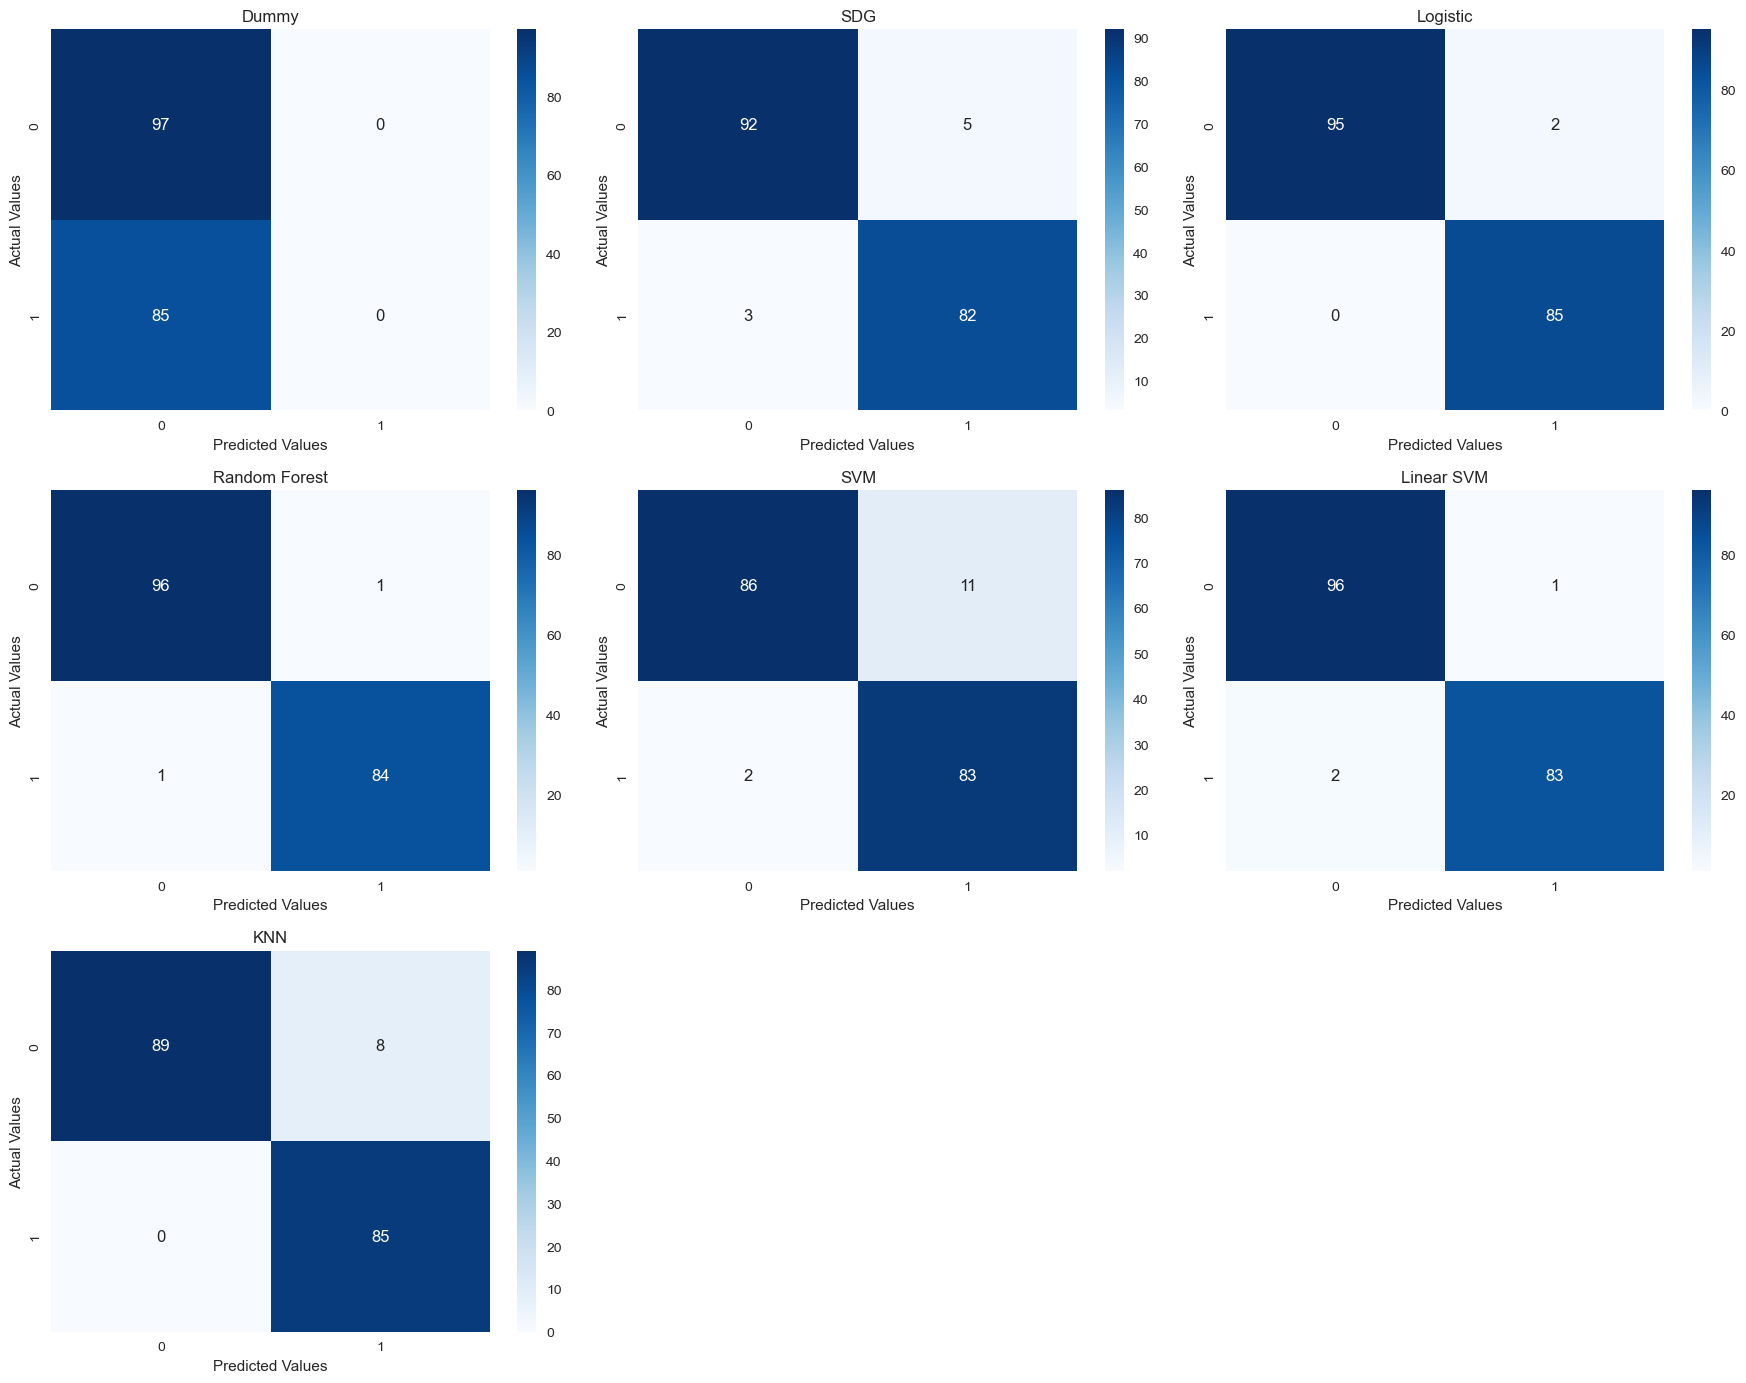

In [27]:
fig = plt.figure(figsize = (18,14))

num_plots = len(cm_list)

num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

for i in range(num_plots):
  cm, model = cm_list[i], model_index[i]
  ax = fig.add_subplot(num_rows, num_cols, i+1)
  ax.set_title(model)
  cm_plot = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
  cm_plot.set_xlabel("Predicted Values")
  cm_plot.set_ylabel("Actual Values")

plt.tight_layout()
plt.show()
  

### **Result Dataframe**

In [28]:
results_df = pd.DataFrame({"Model":model_index, "Accuracy": acc_list,
                           "Precision (Normoxia)": prec_list_n, "Recall (Normoxia)": rec_list_n, "F1 (Normoxia)": f1_list_n, "Auc": auc_list})
results_df


,Model,Accuracy,Precision (Normoxia),Recall (Normoxia),F1 (Normoxia),Auc
0,Dummy,0.533±0.024,0.0±0.0,0.0±0.0,0.0±0.0,NaN
1,SDG,0.956±0.033,0.943±0.0,0.965±0.0,0.953±0.0,0.987
2,Logistic,0.994±0.017,0.977±0.0,1.0±0.0,0.988±0.0,0.998
3,Random Forest,0.989±0.033,0.988±0.0,0.988±0.0,0.988±0.0,0.998
4,SVM,0.928±0.05,0.883±0.0,0.976±0.0,0.927±0.0,0.998
5,Linear SVM,0.983±0.036,0.988±0.0,0.976±0.0,0.982±0.0,0.992
6,KNN,0.956±0.041,0.914±0.0,1.0±0.0,0.955±0.0,0.987


The result should be read as: mean value of the scores calculated with 10-fold cross-validation ± standard deviation of the scores

We see that the models actually behave well, but none of them actually achieves perfect classification.

To be more precise,  within everything that has been predicted as a positive, the **precision score** counts the percentage that is correct, while the **recall score** computes the percentage of actually positive labels that the model correctly predicted. The **f1 score** combines the two, giving us the harmonic mean between precision and recall and it is proved to work well on imbalanced data. Finally, the **ROC AUC score** tells us how much the model is capable of distinguishing between classes.

To decide which is the best model, we compute an average of all the scores and choose the model with highest **composite score**.

In [29]:
results_df['Composite score'] = results_df[['Accuracy', 'Auc', 'F1 (Normoxia)', 'Precision (Normoxia)', 'Recall (Normoxia)']].mean(axis=1)
results_df = results_df.sort_values(by='Composite score', ascending=False)

best_models = results_df[results_df['Composite score'] == results_df['Composite score'].max()]
print(f"The best model(s) based on the composite score are:\n{best_models['Model']}")

The best model(s) based on the composite score are:
2         Logistic
3    Random Forest
4              SVM
Name: Model, dtype: object


/var/folders/f_/v_3n55497xl81517pgtypd8c0000gn/T/ipykernel_30395/3320928478.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_df['Composite score'] = results_df[['Accuracy', 'Auc', 'F1 (Normoxia)', 'Precision (Normoxia)', 'Recall (Normoxia)']].mean(axis=1)


### **Most Relevant Genes**

Now we want to understand which are the genes that influence the most our models, i.e. the ones that have higher relevance on the prediction of hypoxia and normoxia. It would be interesting to see whether these genes correspond to the ones we found as most expressed in the Gene Annotation part. 

In [ ]:
from collections import defaultdict

def most_common_keys(dict_list, num_keys=5):
    keys_list = []
    for d in dict_list:
        keys_list.extend(d.keys())

    key_count = defaultdict(int)

    for key in keys_list:
        key_count[key] += 1

    sorted_keys = sorted(key_count, key=key_count.get, reverse=True)

    return sorted_keys[:num_keys]

In [ ]:
imp_list = [x for x in imp_list if x]

In [ ]:
most_common_keys(imp_list, 5)

These genes were not present in the database we used for gene annotation: this probably indicates that they are not genetic markers. <br>

## **Pathway analysis**

In this part, we want to perform functional analysis. Being short, it means that we want to perform an analysis to understand the role of the identified genes in the biological pathways, networks, or cellular processes they are involved in. So we want to analyze genes, in order to understand their potential roles. In particular, we are going to focus on pathway analysis.

There are various ways in which we can perform functional pathway analysis:
- Over-representation analysis (ORA)
- Functional class scoring (FCS)

In particular, they are useful in order to identify key genes within a previously known pathway.

**Over-representation analysis**

Also known as gene enrichment analysis, it is a statistical analysis that determines whether the genes from the pre-defined list are present more than would be expected in some dataset. Gene set enrichment analysis uses gene sets that have been grouped together by their involvement in the same biological pathway, or by proximal location on a chromosome. For instance, a database of these predefined sets can be found in the Molecular Signatures database (MSigDB).

Then, to determine whether any categories are over-represented, you can determine the probability of having the observed proportion of genes in your gene list in a certain gene set, with comparison to genes in the background set. Usually, test like the Fisher exact test are used to obtain a p-value, that represents how much the genes are over-represented. Notice that since we are testing for many pathways, usually we have to make multiple testing corrections. Adjusted p-values take this problem into account.

The problem with over-representation analysis is that the genes that we test are usually the results of a DE analysis. Therefore, the results depend very much on the genes that are retained. While this is not the case, still we can have some problems of this kind.


**Functional class scoring**

To fix the problem before, often FGS is used. In particular, this method identifies FGS by considering their relative positions in the full list of genes studied in the experiment. So it tries to remove dependencies on gene selection criteria.

The hypothesis of FCS methods is that although large changes in individual genes can have significant effects on pathways (and will be detected via ORA methods), weaker but coordinated changes in sets of functionally related genes (i.e., pathways) can also have significant effects. Thus, rather than setting an arbitrary threshold to identify 'significant genes’, all genes are considered in the analysis. The gene-level statistics from the dataset are aggregated to generate a single pathway-level statistic and statistical significance of each pathway is reported. 

Since we have not performed DE on the genes, we prefer not to proceed with functional class scoring, but instead do an over-representation analysis just based on the genes that we found more relevant in our classification.

In [ ]:
!sudo apt install libcairo2-dev pkg-config python3-dev -y &> /dev/null
#keggs
!pip install -q biopython
!pip install -q pycairo
!pip install -q ReportLab

#gseapy
!pip install -q gseapy

In [35]:
#library needed for kegg
from IPython.display import Image     # Show images inline
import io                             # Standard library packages
import os
from Bio import SeqIO                 # Import Biopython modules to interact with KEGG
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

#gseapy
import gseapy as gp

In [36]:
#import dataset
h_train = pd.read_csv("./HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=' ')

We know that in order to perform an over-representation analysis, we need 3 inputs. In particular, we need:
- Gene list of interest. In our case we are going to use the genes that we have found to be more relevant for the classification of hypoxia/normoxia. Other approaches would be to use a gene list given by DE.
- List of background genes. Using as background genes the human genome might not be the best choice. In particular, this might show us an over-representation of our genes in the pathways of breast cancer. However, while we tried different sets as background genes, the results were essentially the same; therefore we kept the default settings.
- List of gene sets. They are just groups of related genes.

Then we compare our gene list with our background list to see if certain pathways are over-represented. This is shown through a p-value. Notice that there is also an adjusted p-value, that corrects for multiple testing.

In [37]:
#define gene_list, gene_sets, gene_background
gene_list = ['PSMD2', 'HSPA8', 'TUBB', 'ACTG1', 'TUBA1B', 'LDHB', 'AKR1C2', 'SQSTM1', 'KRT18', 'PLAU', 'TFRC', 'H4C3', 'MMP1', 'MT-CYB', 'PRDX1', 'LAMC2', 'MALAT1', 'HMGA1', 'AKR1C3', 'SERPINB5', 'PRNP', 'DKK1', 'CD44', 'GPX3', 'S100A2', 'MT-CO3', 'RRM2', 'KPNA2', 'SRXN1', 'TUBB4B', 'KCNH3', 'DUOXA1', 'EPHA4', 'FLRT3', 'OR8G3P', 'ZIC5', 'JADE3', 'FLI1', 'IRF5', 'GUCY1B1', 'ANKRD1', 'ZNF77', 'ZNF311', 'CGN', 'FHIP2B', 'FBN1', 'ZDHHC23', 'S1PR1', 'BBS12', 'PCDH9', 'SEMA4A', 'NRIP3', 'NPNT', 'C3', 'DNER', 'TCN2', 'PDCD1LG2', 'TDRD7', 'ZNF878', 'HKDC1', 'DDIT4', 'NDRG1', 'FAM162A', 'C4orf3', 'BNIP3L', 'ANGPTL4', 'P4HA1', 'CA9', 'PGK1', 'PLOD2', 'FUT11', 'EGLN1', 'ALDOA', 'SLC2A1', 'LDHA', 'PFKFB3', 'SLC6A8', 'LOXL2', 'MOB3A', 'MIF-AS1', 'BNIP3', 'GPI', 'PLIN2', 'ERO1A', 'KCTD11', 'EIF5', 'TPBG', 'STC2', 'KYNU', 'INSIG1', 'TXN', 'ITGA6', 'NQO1', 'KRT6A', 'CAV1', 'CDC20', 'F3', 'CCNB1']
gene_sets = ['MSigDB_Hallmark_2020','KEGG_2021_Human']
gene_background = None
#https://maayanlab.cloud/Enrichr/#libraries to have more gene_sets

For the sake of simplicity, we will not curate much specific background genes. While we know that the choice is important, we will deal with the genes that SmartSeq identified. We could also consider other genes that are associated to breast cancer, but we are not going to do that in this discussion.
Moreover, for the gene sets, we are going to analyse some of those that are present in the Enrichr library.

In [ ]:
#RUN THIS CODE IF YOU WANT TO PERFORM THE ANALYSIS WITH CUSTOM BACKGROUND GENES
# kegg_hum = gp.get_library(name='KEGG_2021_Human', organism='Human')
# msi_hall = gp.get_library(name='MSigDB_Hallmark_2020', organism='Human')
# msi_onco = gp.get_library(name='MSigDB_Oncogenic_Signatures', organism='Human')
# msi_comp = gp.get_library(name='MSigDB_Computational', organism='Human')

# kegg_hum.update(msi_onco)
# kegg_hum.update(msi_hall)
# kegg_hum.update(msi_comp)

# gene_sets = kegg_hum

# gene_background = pd.read_csv(path_h_unfiltered, sep = " ").index.to_list()

In [38]:
enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets, 
                 organism='human', 
                 background=gene_background,
                 outdir=None, 
                )

In [39]:
enr.results[enr.results['Gene_set'] == 'MSigDB_Hallmark_2020'].head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Hypoxia,18/200,4.704884e-18,1.740807e-16,0,0,24.379121,972.676474,ERO1A;BNIP3L;GPI;PFKFB3;CAV1;TPBG;SLC2A1;NDRG1...
1,MSigDB_Hallmark_2020,mTORC1 Signaling,14/200,9.881888e-13,1.828149e-11,0,0,17.666667,488.357946,ERO1A;GPI;RRM2;TFRC;INSIG1;SLC2A1;PLOD2;LDHA;P...
2,MSigDB_Hallmark_2020,Glycolysis,13/200,1.724716e-11,2.127150e-10,0,0,16.124253,399.613384,ERO1A;TPBG;PLOD2;TXN;LDHA;P4HA1;FAM162A;STC2;D...
3,MSigDB_Hallmark_2020,Reactive Oxygen Species Pathway,6/49,1.398250e-07,1.293382e-06,0,0,30.119818,475.377290,NQO1;PRNP;SRXN1;GPX3;PRDX1;TXN
4,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,8/200,6.336140e-06,4.688743e-05,0,0,9.125000,109.219323,SLC6A8;MMP1;PLOD2;LAMC2;DKK1;CD44;LOXL2;FBN1


In [40]:
enr.results[enr.results['Gene_set'] == 'KEGG_2021_Human'].head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
37,KEGG_2021_Human,HIF-1 signaling pathway,9/109,3.187636e-09,4.781453e-07,0,0,20.024494,391.758935,EGLN1;LDHB;LDHA;PFKFB3;TFRC;HKDC1;SLC2A1;PGK1;...
38,KEGG_2021_Human,Glycolysis / Gluconeogenesis,6/67,9.295115e-07,6.971336e-05,0,0,21.212758,294.615658,GPI;LDHB;LDHA;HKDC1;PGK1;ALDOA
39,KEGG_2021_Human,Phagosome,6/152,1.033415e-04,5.167075e-03,0,0,8.824896,80.990230,C3;TUBA1B;TFRC;TUBB;TUBB4B;ACTG1
40,KEGG_2021_Human,Central carbon metabolism in cancer,4/70,3.879075e-04,1.178292e-02,0,0,12.789168,100.455637,LDHB;LDHA;HKDC1;SLC2A1
41,KEGG_2021_Human,Prion disease,7/273,3.927641e-04,1.178292e-02,0,0,5.678427,44.531934,PRNP;HSPA8;TUBA1B;PSMD2;CAV1;TUBB;TUBB4B


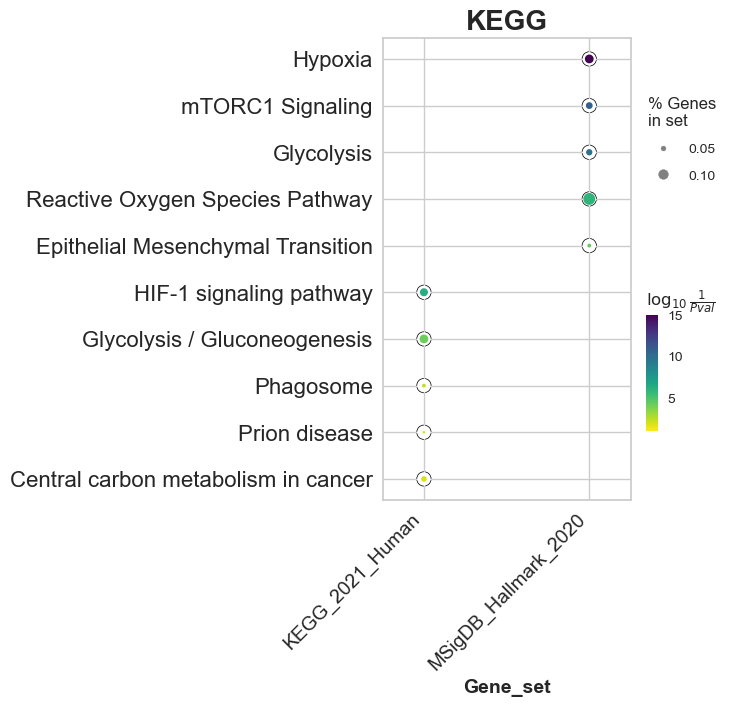

In [41]:
#Show top 5 terms of each gene_set ranked by “Adjusted P-value”
from gseapy import barplot, dotplot

ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(4,6),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

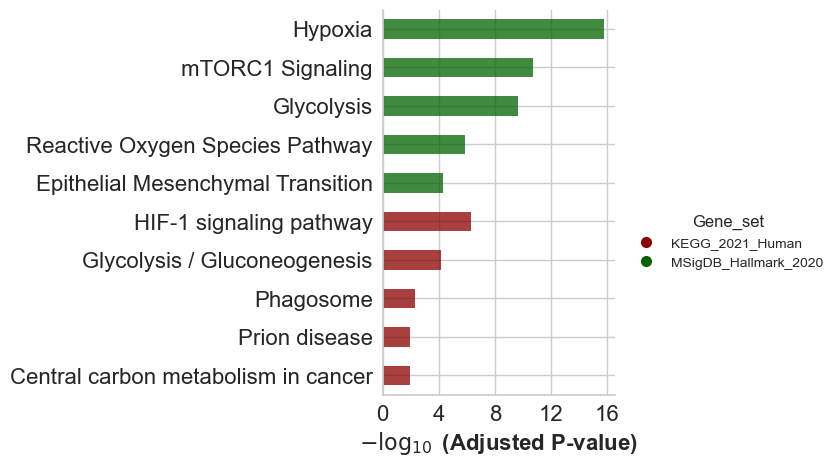

In [42]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkgreen'] # set colors for group
             )

Now we want to try and understand if the results make sense. In order to do so, let's see what the gene sets are and let's visualize, if possible, some of them. 

In particular, let's see the most important ones. Let's start with the MsigDB Hallmark gene sets. Recall that hallmark gene sets summarize and represent specific well-defined biological states or processes and display coherent expression.
For the informations, we have seen some literature online, but we recall you that we are not experts. 

We immediately see that the gene sets that are over-represented are the ones corresponding to:
- Hypoxia. This is of course to be expected, since we have used as our gene list the genes that are relevant for classification of hypoxia.

- mTORC1 Signaling. mTORC1 (mTOR complex-1) coordinates cell growth and metabolism, acting as a restriction point under stress conditions such as hypoxia. So, hypoxia suppresses mTORC1 signaling. In particular, in response to hypoxia, cells rapidly activate a variety of adaptive mechanisms that limit energy expenditure through inhibition of energy-intensive processes. A major mechanism for this effect involves the inhibition of mTORC1 activity.

- Glycolysis: Under hypoxia, tumor cells prefer glycolysis as an ATP source. Though less energy-efficient than oxidative phosphorylation, glycolysis generates metabolic intermediates for cell growth and proliferation. Thus, the induction of glycolytic metabolism under reduced oxygen concentration represents a significant advantage to cancer cells.

- Reactive Oxygen Species pathway. In particular, an hypoxic microenvironment may lead to increased levels of reactive oxygen species (ROS) production compared to normal cells, which may contribute to tumour progression and metastasis. ROS also play critical roles in the regulation of signal transduction pathways in a range of cellular processes and are increased by hypoxia in a number of cell types.

Now let's pass to the gene sets in KEGG. Notice that here many gene sets are repeated. In particular, we can find again glycolysis, hypoxia (HIF-1 signaling pathway; HIF-1 is the main hypoxia-inducible factor). The others we weren't able to properly analyse.

Now we can use KEGG to visualize better the pathways that we have seen that are over-represented. In fact, we can search on the site the pathways and show them.

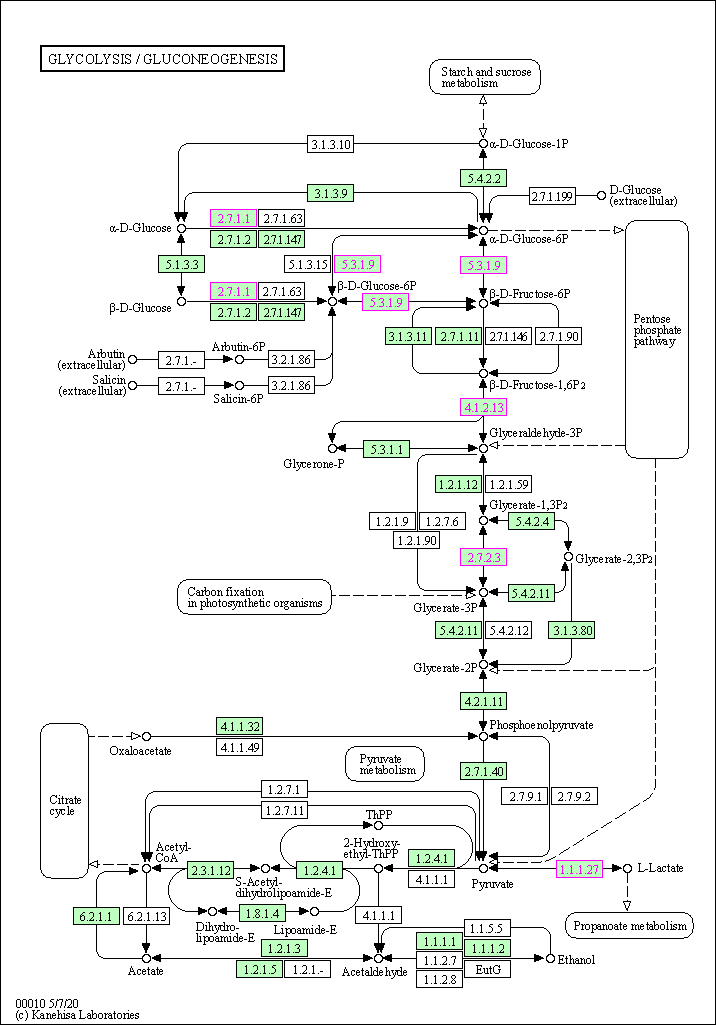

In [44]:
from IPython.display import Image, display

display(Image(filename='./hsa00010 H.png', width = 600))

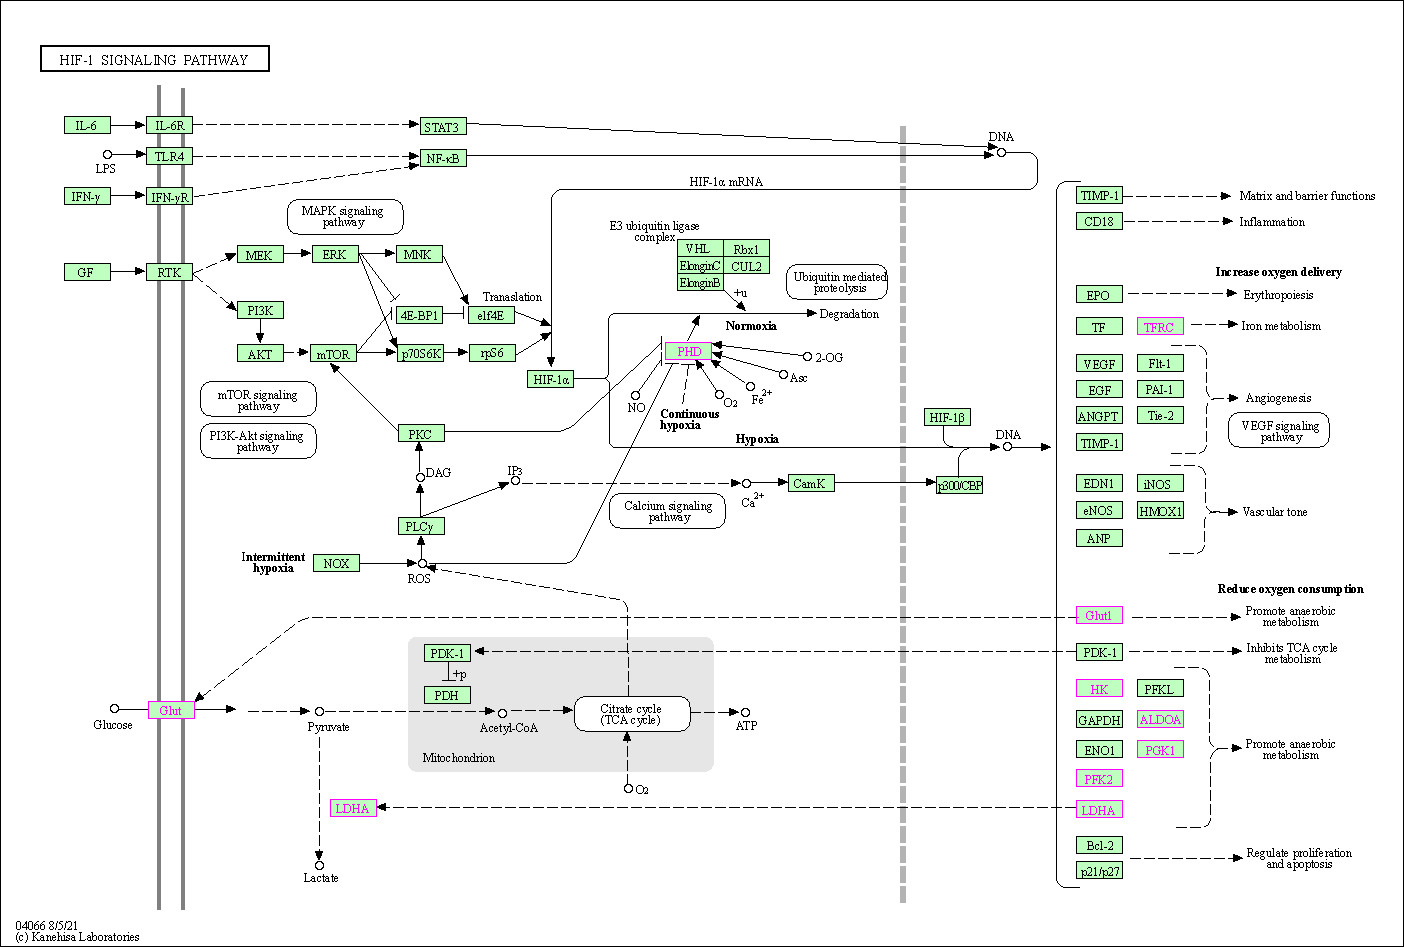

In [45]:
display(Image(filename='./hsa04066 H.png', height = 600))

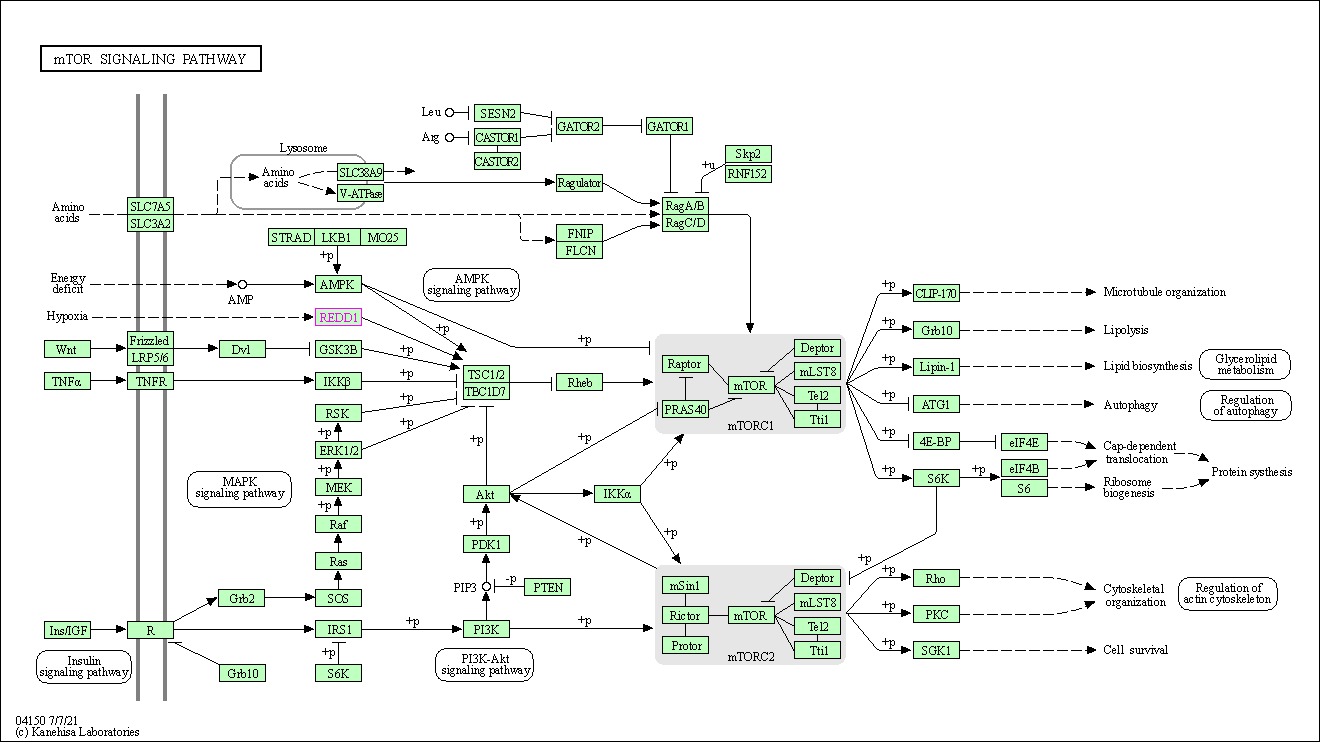

In [47]:
display(Image(filename='./hsa04150 H.png', height = 600))

# **Other approaches**

When doing supervised learning another classification method to introduce could be an Artificial Neural Network (ANN). 

However,we decided that in our situation using a neural network is not necessary or even beneficial. The main reason being that the problem at hand can be adequately addressed with a simpler algorithm, such as a linear model, and using a neural network is not be worth the added computational (and time) cost.

Another reason is that neural networks are black boxes, which means that it can be difficult to understand how they make their predictions. This lack of interpretability can be problematic in our applications since the main goal of this project is to be descriptive.